**Problem Statement**
=====================

### Title
Predicting High-Value Customer Churn for Telecom Company

### Description
The telecom company is facing a challenge of high-value customers churning to other networks. The company wants to identify the factors that contribute to customer churn and predict which high-value customers are likely to churn in the near future.

### Objective
Develop a machine learning model that can predict the likelihood of high-value customers churning to other networks, enabling the company to take proactive steps to retain them.

### Key Questions
* What are the key factors that contribute to customer churn?
* Can we predict which high-value customers are likely to churn in the near future?
* What proactive steps can the company take to retain high-value customers who are likely to churn?


In [2]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Loading Data

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(df.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [3]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [5]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [6]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [7]:
# Checking information about data.
print(df.info())
def metadata_matrix(data) : 
    return pd.DataFrame({
                'Datatype' : data.dtypes.astype(str), 
                'Non_Null_Count': data.count(axis = 0).astype(int), 
                'Null_Count': data.isnull().sum().astype(int), 
                'Null_Percentage': round(data.isnull().sum()/len(data) * 100 , 2), 
                'Unique_Values_Count': data.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

metadata_matrix(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB
None


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,17568,52431,74.90,5506
count_rech_2g_6,float64,17568,52431,74.90,30
night_pck_user_6,float64,17568,52431,74.90,2
arpu_2g_6,float64,17568,52431,74.90,5389
date_of_last_rech_data_6,object,17568,52431,74.90,30
total_rech_data_6,float64,17568,52431,74.90,36
av_rech_amt_data_6,float64,17568,52431,74.90,792
max_rech_data_6,float64,17568,52431,74.90,47
count_rech_3g_6,float64,17568,52431,74.90,23
fb_user_6,float64,17568,52431,74.90,2


#### Data Cleaning

In [8]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability


In [9]:
# Combine missing values and data types into one DataFrame
pd.set_option('display.max_columns', None)
missing_values_info = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Data Type': df.dtypes
})

# Display the result
print(missing_values_info)

                          Missing Values Data Type
id                                     0     int64
circle_id                              0     int64
loc_og_t2o_mou                       702   float64
std_og_t2o_mou                       702   float64
loc_ic_t2o_mou                       702   float64
last_date_of_month_6                   0    object
last_date_of_month_7                 399    object
last_date_of_month_8                 733    object
arpu_6                                 0   float64
arpu_7                                 0   float64
arpu_8                                 0   float64
onnet_mou_6                         2768   float64
onnet_mou_7                         2687   float64
onnet_mou_8                         3703   float64
offnet_mou_6                        2768   float64
offnet_mou_7                        2687   float64
offnet_mou_8                        3703   float64
roam_ic_mou_6                       2768   float64
roam_ic_mou_7                  

In [10]:
#Converting columns into appropriate data types and extracting singe value columns.
# Columns with unique values < 29 are considered as categorical variables. 
# The number 30 is arrived at, by looking at the above metadata_matrix output. 

columns=df.columns
change_to_cat=[]
single_value_col=[]
for column in columns:
    unique_value_count=df[column].nunique()
    if unique_value_count==1:
        single_value_col.append(column)
    if unique_value_count<=29 and unique_value_count!=0 and df[column].dtype in ['int','float']:
        change_to_cat.append(column)
print( ' Columns to change to categorical data type : \n' ,pd.DataFrame(change_to_cat), '\n')

 Columns to change to categorical data type : 
                     0
0           circle_id
1      loc_og_t2o_mou
2      std_og_t2o_mou
3      loc_ic_t2o_mou
4    std_og_t2c_mou_6
5    std_og_t2c_mou_7
6    std_og_t2c_mou_8
7    std_ic_t2o_mou_6
8    std_ic_t2o_mou_7
9    std_ic_t2o_mou_8
10    count_rech_3g_6
11    count_rech_3g_7
12    count_rech_3g_8
13   night_pck_user_6
14   night_pck_user_7
15   night_pck_user_8
16       monthly_2g_6
17       monthly_2g_7
18       monthly_2g_8
19       monthly_3g_6
20       monthly_3g_7
21       monthly_3g_8
22        sachet_3g_6
23        sachet_3g_7
24        sachet_3g_8
25          fb_user_6
26          fb_user_7
27          fb_user_8
28  churn_probability 



In [11]:
# Converting all the above columns having <=29 unique values into categorical data type.
df[change_to_cat]=df[change_to_cat].astype('category')

In [12]:
# Converting *sachet* variables to categorical data type 
sachet_columns = df.filter(regex='.*sachet.*', axis=1).columns.values

In [13]:
sachet_columns

array(['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8'], dtype=object)

In [14]:
df[['sachet_2g_6','sachet_2g_7']]

,sachet_2g_6,sachet_2g_7
0,0,0
1,0,0
2,0,0
3,0,0
4,7,6
...,...,...
69994,0,6
69995,0,0
69996,0,0
69997,0,0


In [15]:
# Converting *sachet* variables to categorical data type 

df[sachet_columns] = df[sachet_columns].astype('category')


In [16]:
#Changing datatype of date variables to datetime.
columns=df.columns
col_with_date=[]
import re
for column in columns:
    x = re.findall("^date", column)
    if x:
        col_with_date.append(column)
df[col_with_date].dtypes

date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
dtype: object

In [17]:
# Checking the date format
df[col_with_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014


In [18]:
for col in col_with_date:
    df[col]=pd.to_datetime(df[col], format="%m/%d/%Y")
df[col_with_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-22,2014-07-10,2014-08-24,NaT,NaT,NaT
1,2014-06-12,2014-07-10,2014-08-26,NaT,2014-07-08,NaT
2,2014-06-11,2014-07-22,2014-08-24,NaT,NaT,NaT
3,2014-06-15,2014-07-21,2014-08-25,NaT,NaT,NaT
4,2014-06-25,2014-07-26,2014-08-30,2014-06-25,2014-07-23,2014-08-20


### Filtering High Value Customers
Customers are High Values if their Average recharge amount of june and july is more than or equal to 70th percentile of Average recharge amount.

In [19]:
#Deriving Average recharge amount of June and July.
df['Average_rech_amt_6n7']=(df['total_rech_amt_6']+df['total_rech_amt_7'])/2

In [20]:
#Filtering based HIGH VALUED CUSTOMERS based on (Average_rech_amt_6n7 >= 70th percentile of Average_rech_amt_6n7)
df=df[(df['Average_rech_amt_6n7']>= df['Average_rech_amt_6n7'].quantile(0.7))]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21018 entries, 12 to 69996
Columns: 173 entries, id to Average_rech_amt_6n7
dtypes: category(32), datetime64[ns](6), float64(118), int64(14), object(3)
memory usage: 23.4+ MB


### Missing Value

In [22]:
#Checking for missing values.
missing_values = metadata_matrix(df)[['Datatype', 'Null_Percentage']].sort_values(by='Null_Percentage', ascending=False)
missing_values

,Datatype,Null_Percentage
count_rech_3g_6,category,62.43
max_rech_data_6,float64,62.43
count_rech_2g_6,float64,62.43
arpu_3g_6,float64,62.43
date_of_last_rech_data_6,datetime64[ns],62.43
night_pck_user_6,category,62.43
total_rech_data_6,float64,62.43
arpu_2g_6,float64,62.43
fb_user_6,category,62.43
av_rech_amt_data_6,float64,62.43


In [23]:
# Columns with high missing values , > 50%
metadata = metadata_matrix(df)
condition = metadata['Null_Percentage'] > 50 
high_missing_values = metadata[condition]
high_missing_values

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
count_rech_3g_6,category,7896,13122,62.43,23
av_rech_amt_data_6,float64,7896,13122,62.43,703
max_rech_data_6,float64,7896,13122,62.43,43
count_rech_2g_6,float64,7896,13122,62.43,28
arpu_3g_6,float64,7896,13122,62.43,3499
date_of_last_rech_data_6,datetime64[ns],7896,13122,62.43,30
night_pck_user_6,category,7896,13122,62.43,2
total_rech_data_6,float64,7896,13122,62.43,34
arpu_2g_6,float64,7896,13122,62.43,3298
fb_user_6,category,7896,13122,62.43,2


In [24]:
# Dropping above columns with high missing values 
high_missing_value_columns = high_missing_values.index 
df.drop(columns=high_missing_value_columns, inplace=True)

In [25]:
# Looking at remaining columns with missing values 
metadata_matrix(df)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_mou_8,float64,20363,655,3.12,14491
og_others_8,float64,20363,655,3.12,106
loc_og_t2f_mou_8,float64,20363,655,3.12,2654
loc_ic_t2t_mou_8,float64,20363,655,3.12,8085
spl_og_mou_8,float64,20363,655,3.12,2795
loc_og_t2m_mou_8,float64,20363,655,3.12,12795
loc_ic_t2m_mou_8,float64,20363,655,3.12,12491
loc_ic_t2f_mou_8,float64,20363,655,3.12,3958
loc_og_t2t_mou_8,float64,20363,655,3.12,8824
std_og_t2f_mou_8,float64,20363,655,3.12,1303


In [26]:
sixth_month_columns = []
for column in df.columns:
    x = re.search("6$", column)
    if x:
        sixth_month_columns.append(column)
# missing_values.loc[sixth_month_columns].sort_values(by='Null_Percentage', ascending=False)
metadata = metadata_matrix(df)
condition = metadata.index.isin(sixth_month_columns)
sixth_month_metadata = metadata[condition]
sixth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
isd_og_mou_6,float64,20795,223,1.06,859
spl_og_mou_6,float64,20795,223,1.06,2643
std_og_mou_6,float64,20795,223,1.06,13776
loc_ic_t2f_mou_6,float64,20795,223,1.06,4018
loc_ic_t2t_mou_6,float64,20795,223,1.06,8285
loc_ic_t2m_mou_6,float64,20795,223,1.06,12885
loc_ic_mou_6,float64,20795,223,1.06,14882
std_ic_t2t_mou_6,float64,20795,223,1.06,3805
std_ic_t2m_mou_6,float64,20795,223,1.06,5571
std_ic_t2f_mou_6,float64,20795,223,1.06,1652


In [27]:
 df['last_date_of_month_6']=pd.to_datetime(df['last_date_of_month_6'], format="%m/%d/%Y")

In [28]:
sixth_month_meaningful_missing_condition = sixth_month_metadata['Null_Percentage'] == 1.06
sixth_month_meaningful_missing_cols = sixth_month_metadata[sixth_month_meaningful_missing_condition].index.values
sixth_month_meaningful_missing_cols

array(['isd_og_mou_6', 'spl_og_mou_6', 'std_og_mou_6', 'loc_ic_t2f_mou_6',
       'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_mou_6',
       'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6',
       'std_ic_t2o_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6',
       'ic_others_6', 'std_og_t2c_mou_6', 'og_others_6', 'roam_ic_mou_6',
       'std_og_t2t_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2f_mou_6',
       'roam_og_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'onnet_mou_6',
       'offnet_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'loc_og_t2m_mou_6'], dtype=object)

In [29]:
df[sixth_month_meaningful_missing_cols] = df[sixth_month_meaningful_missing_cols].fillna(0)

In [30]:
metadata = metadata_matrix(df)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(sixth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,datetime64[ns],20976,42,0.2,30
total_rech_num_6,int64,21018,0,0.0,94
total_rech_amt_6,int64,21018,0,0.0,2027
max_rech_amt_6,int64,21018,0,0.0,160
monthly_2g_6,category,21018,0,0.0,5
sachet_2g_6,category,21018,0,0.0,27
vol_3g_mb_6,float64,21018,0,0.0,4919
vol_2g_mb_6,float64,21018,0,0.0,5738
monthly_3g_6,category,21018,0,0.0,10
last_day_rch_amt_6,int64,21018,0,0.0,152


In [31]:
# Looking at 'recharge' related 6th month columns for customers with missing 'date_of_last_rech_6' 
condition = df['date_of_last_rech_6'].isnull()
df[condition].filter(regex='.*rech.*6$', axis=1).head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6
1575,0,0,0,NaT
2583,0,0,0,NaT
3008,0,0,0,NaT
3332,0,0,0,NaT
6809,0,0,0,NaT


In [32]:
df[condition].filter(regex='.*rech.*6$', axis=1).nunique()

total_rech_num_6       1
total_rech_amt_6       1
max_rech_amt_6         1
date_of_last_rech_6    0
dtype: int64

Notice, that the recharge related columns for customers with missing 'date_of_last_rech_6' has just one unique value. From the first few rows of the output, we see that this is 0.
Hence, 'date_of_last_rech_6' is missing since there were no recharges made in this month.
These are meaning missing values


In [33]:
df.drop('date_of_last_rech_6', axis=1, inplace=True)

In [34]:
# Check for missing values in 6th month variables
metadata = metadata_matrix(df)
metadata.info()
metadata[metadata.index.isin(sixth_month_columns)]

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, isd_ic_mou_8 to Average_rech_amt_6n7
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datatype             142 non-null    object 
 1   Non_Null_Count       142 non-null    int64  
 2   Null_Count           142 non-null    int64  
 3   Null_Percentage      142 non-null    float64
 4   Unique_Values_Count  142 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 6.7+ KB


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
total_rech_amt_6,int64,21018,0,0.0,2027
total_rech_num_6,int64,21018,0,0.0,94
max_rech_amt_6,int64,21018,0,0.0,160
last_day_rch_amt_6,int64,21018,0,0.0,152
sachet_3g_6,category,21018,0,0.0,23
monthly_3g_6,category,21018,0,0.0,10
sachet_2g_6,category,21018,0,0.0,27
monthly_2g_6,category,21018,0,0.0,5
vol_3g_mb_6,float64,21018,0,0.0,4919
vol_2g_mb_6,float64,21018,0,0.0,5738


In [35]:
# Month : 7 
seventh_month_columns = df.filter(regex='7$', axis=1).columns
seventh_month_columns

Index(['last_date_of_month_7', 'arpu_7', 'onnet_mou_7', 'offnet_mou_7',
       'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7',
       'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7',
       'std_ic_t2o_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7',
       'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7',
       'max_rech_amt_7', 'date_of_last_rech_7', 'last_day_rch_amt_7',
       'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7', 'sachet_2g_7',
       'monthly_3g_7', 'sachet_3g_7', 'Average_rech_amt_6n7'],
      dtype='object')

In [36]:
seventh_month_metadata = metadata[metadata.index.isin(seventh_month_columns)]
seventh_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_mou_7,float64,20810,208,0.99,14887
loc_ic_t2t_mou_7,float64,20810,208,0.99,8316
std_ic_t2t_mou_7,float64,20810,208,0.99,3896
isd_ic_mou_7,float64,20810,208,0.99,2795
og_others_7,float64,20810,208,0.99,89
onnet_mou_7,float64,20810,208,0.99,14691
spl_og_mou_7,float64,20810,208,0.99,2897
std_ic_t2m_mou_7,float64,20810,208,0.99,5647
loc_ic_t2m_mou_7,float64,20810,208,0.99,12970
isd_og_mou_7,float64,20810,208,0.99,864


In [37]:
#  columns with meaningful missing in 7th month 
seventh_month_meaningful_missing_condition = seventh_month_metadata['Null_Percentage'] == .99
seventh_month_meaningful_missing_cols = seventh_month_metadata[seventh_month_meaningful_missing_condition].index.values
seventh_month_meaningful_missing_cols

array(['loc_ic_mou_7', 'loc_ic_t2t_mou_7', 'std_ic_t2t_mou_7',
       'isd_ic_mou_7', 'og_others_7', 'onnet_mou_7', 'spl_og_mou_7',
       'std_ic_t2m_mou_7', 'loc_ic_t2m_mou_7', 'isd_og_mou_7',
       'spl_ic_mou_7', 'std_og_mou_7', 'ic_others_7', 'loc_ic_t2f_mou_7',
       'loc_og_t2t_mou_7', 'roam_og_mou_7', 'std_og_t2f_mou_7',
       'loc_og_mou_7', 'std_ic_mou_7', 'loc_og_t2m_mou_7',
       'loc_og_t2f_mou_7', 'roam_ic_mou_7', 'std_ic_t2o_mou_7',
       'loc_og_t2c_mou_7', 'std_og_t2c_mou_7', 'std_og_t2t_mou_7',
       'offnet_mou_7', 'std_ic_t2f_mou_7', 'std_og_t2m_mou_7'],
      dtype=object)

In [38]:
# Imputation
df[seventh_month_meaningful_missing_cols] = df[seventh_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(df)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(seventh_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_7,datetime64[ns],20936,82,0.39,31
last_date_of_month_7,object,20998,20,0.10,1
total_rech_num_7,int64,21018,0,0.00,96
ic_others_7,float64,21018,0,0.00,1119
isd_ic_mou_7,float64,21018,0,0.00,2795
total_ic_mou_7,float64,21018,0,0.00,15869
std_ic_mou_7,float64,21018,0,0.00,7083
std_ic_t2o_mou_7,category,21018,0,0.00,1
spl_ic_mou_7,float64,21018,0,0.00,84
total_rech_amt_7,int64,21018,0,0.00,2062


In [39]:
# Looking at 'recharge' related 7th month columns for customers with missing 'date_of_last_rech_7' 
condition = df['date_of_last_rech_7'].isnull()
df[condition].filter(regex='.*rech.*7$', axis=1).head()

,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7,Average_rech_amt_6n7
380,0,0,0,NaT,2510.5
1211,0,0,0,NaT,548.0
1728,0,0,0,NaT,393.0
3594,0,0,0,NaT,500.5
3625,0,0,0,NaT,790.5


In [40]:
df[condition].filter(regex='.*rech.*7$', axis=1).nunique()

total_rech_num_7         1
total_rech_amt_7         1
max_rech_amt_7           1
date_of_last_rech_7      0
Average_rech_amt_6n7    68
dtype: int64

**Observation: Missing Values in 'date_of_last_rech_7'**
=====================================================

Notice that the recharge-related columns for customers with missing 'date_of_last_rech_7' have just one unique value. From the first few rows of the output, we see that this value is 0.

This suggests that 'date_of_last_rech_7' is missing because there were no recharges made in this month. Therefore, these are indeed missing values.

In [41]:
 df['last_date_of_month_7']=pd.to_datetime(df['last_date_of_month_7'], format="%m/%d/%Y")

In [42]:
df.drop('date_of_last_rech_7', axis=1, inplace=True)
df['last_date_of_month_7'] = df['last_date_of_month_7'].fillna(df['last_date_of_month_7'].mode()[0])


In [43]:
metadata = metadata_matrix(df)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(seventh_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
spl_ic_mou_7,float64,21018,0,0.0,84
sachet_3g_7,category,21018,0,0.0,26
ic_others_7,float64,21018,0,0.0,1119
isd_ic_mou_7,float64,21018,0,0.0,2795
std_ic_t2o_mou_7,category,21018,0,0.0,1
total_ic_mou_7,float64,21018,0,0.0,15869
std_ic_mou_7,float64,21018,0,0.0,7083
total_rech_num_7,int64,21018,0,0.0,96
monthly_2g_7,category,21018,0,0.0,6
vol_3g_mb_7,float64,21018,0,0.0,5186


In [44]:
#Month 8
eighth_month_columns = df.filter(regex="8$", axis=1).columns
metadata = metadata_matrix(df)
condition = metadata.index.isin(eighth_month_columns)
eighth_month_metadata = metadata[condition]
eighth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_t2m_mou_8,float64,20363,655,3.12,12491
loc_og_t2t_mou_8,float64,20363,655,3.12,8824
loc_og_t2f_mou_8,float64,20363,655,3.12,2654
loc_og_t2c_mou_8,float64,20363,655,3.12,1472
loc_og_mou_8,float64,20363,655,3.12,14507
std_og_t2t_mou_8,float64,20363,655,3.12,8937
std_og_t2m_mou_8,float64,20363,655,3.12,10323
std_og_t2f_mou_8,float64,20363,655,3.12,1303
std_og_t2c_mou_8,category,20363,655,3.12,1
std_og_mou_8,float64,20363,655,3.12,12663


In [45]:
#  columns with meaningful missing in 8th month 
eighth_month_meaningful_missing_condition = eighth_month_metadata['Null_Percentage'] == 3.12
eighth_month_meaningful_missing_cols = eighth_month_metadata[eighth_month_meaningful_missing_condition].index.values
eighth_month_meaningful_missing_cols

array(['loc_ic_t2m_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8',
       'std_og_mou_8', 'isd_og_mou_8', 'ic_others_8', 'spl_og_mou_8',
       'og_others_8', 'isd_ic_mou_8', 'spl_ic_mou_8', 'loc_ic_t2t_mou_8',
       'std_ic_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_t2o_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8',
       'loc_og_t2m_mou_8', 'std_ic_t2m_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'offnet_mou_8', 'onnet_mou_8'], dtype=object)

In [46]:
# Imputation
df[eighth_month_meaningful_missing_cols] = df[eighth_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(df)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(eighth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_8,datetime64[ns],20603,415,1.97,31
last_date_of_month_8,object,20910,108,0.51,1
total_ic_mou_8,float64,21018,0,0.00,15373
spl_ic_mou_8,float64,21018,0,0.00,81
isd_ic_mou_8,float64,21018,0,0.00,2720
ic_others_8,float64,21018,0,0.00,1041
std_ic_mou_8,float64,21018,0,0.00,6715
std_ic_t2o_mou_8,category,21018,0,0.00,1
total_rech_num_8,int64,21018,0,0.00,90
std_ic_t2f_mou_8,float64,21018,0,0.00,1614


In [47]:
# Looking at 'recharge' related 8th month columns for customers with missing 'date_of_last_rech_8' 
condition = df['date_of_last_rech_8'].isnull()
df[condition].filter(regex='.*rech.*8$', axis=1).head()

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8
183,0,0,0,NaT
224,0,0,0,NaT
1015,0,0,0,NaT
1127,0,0,0,NaT
1395,0,0,0,NaT


In [48]:
df[condition].filter(regex='.*rech.*8$', axis=1).nunique()

total_rech_num_8       1
total_rech_amt_8       1
max_rech_amt_8         1
date_of_last_rech_8    0
dtype: int64

In [49]:
df['last_date_of_month_8']=pd.to_datetime(df['last_date_of_month_8'], format="%m/%d/%Y")
df.drop('date_of_last_rech_8', axis=1, inplace=True)
df['last_date_of_month_8'] = df['last_date_of_month_8'].fillna(df['last_date_of_month_8'].mode()[0])

In [50]:
metadata = metadata_matrix(df)
metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_og_t2o_mou,category,20943,75,0.36,1
std_og_t2o_mou,category,20943,75,0.36,1
loc_ic_t2o_mou,category,20943,75,0.36,1
id,int64,21018,0,0.00,21018
spl_ic_mou_8,float64,21018,0,0.00,81
std_ic_mou_8,float64,21018,0,0.00,6715
total_ic_mou_6,float64,21018,0,0.00,15740
total_ic_mou_7,float64,21018,0,0.00,15869
total_ic_mou_8,float64,21018,0,0.00,15373
spl_ic_mou_6,float64,21018,0,0.00,74


Dropping columns with one unique value.

In [51]:
metadata=metadata_matrix(df)
singular_value_cols=metadata[metadata['Unique_Values_Count']==1].index.values

In [52]:
singular_value_cols

array(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_6',
       'circle_id', 'last_date_of_month_8', 'last_date_of_month_7',
       'last_date_of_month_6', 'std_og_t2c_mou_8', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_6'], dtype=object)

In [53]:
#Dropping singular value columns.
df.drop(columns=singular_value_cols,inplace=True)

In [54]:
# Dropping date columns 
# since they are not usage related columns and can't be used for modelling 
date_columns = df.filter(regex='^date.*').columns
df.drop(columns=date_columns, inplace=True)
metadata_matrix(df)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
id,int64,21018,0,0.0,21018
total_ic_mou_7,float64,21018,0,0.0,15869
total_rech_num_8,int64,21018,0,0.0,90
total_rech_num_7,int64,21018,0,0.0,96
total_rech_num_6,int64,21018,0,0.0,94
ic_others_8,float64,21018,0,0.0,1041
ic_others_7,float64,21018,0,0.0,1119
ic_others_6,float64,21018,0,0.0,1011
isd_ic_mou_8,float64,21018,0,0.0,2720
isd_ic_mou_7,float64,21018,0,0.0,2795


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21018 entries, 12 to 69996
Columns: 127 entries, id to Average_rech_amt_6n7
dtypes: category(13), float64(100), int64(14)
memory usage: 18.7 MB


In [56]:
df.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Average_rech_amt_6n7
count,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000
mean,35066.169902,587.231005,587.494059,532.941482,298.177216,305.269196,268.152401,421.464188,424.304702,375.210907,17.201006,13.686279,12.996392,30.067043,22.115605,20.857929,94.130917,95.296144,86.918496,180.902626,179.605683,165.875224,6.916293,7.042256,6.465887,1.593914,1.829117,1.680497,281.958656,281.953030,259.268039,192.017371,201.081032,173.014018,206.516515,215.495507,181.876113,2.004580,1.930348,1.751842,400.542851,418.511223,356.645843,2.431516,2.339412,2.214330,5.974054,7.402298,6.901300,0.692966,0.032845,0.057744,691.609882,710.247565,625.095547,68.500032,69.568425,65.615044,158.477424,158.468825,151.628056,15.596780,16.570426,14.777306,242.584098,244.617698,232.029992,15.813055,16.499474,14.861577,31.886654,33.137205,29.891175,2.898479,2.982596,2.620437,50.602159,52.623309,47.376926,305.186690,310.657269,292.149396,0.067680,0.017

### Exploratory Data Analysis

In [57]:
df.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Average_rech_amt_6n7
count,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000,21018.000000
mean,35066.169902,587.231005,587.494059,532.941482,298.177216,305.269196,268.152401,421.464188,424.304702,375.210907,17.201006,13.686279,12.996392,30.067043,22.115605,20.857929,94.130917,95.296144,86.918496,180.902626,179.605683,165.875224,6.916293,7.042256,6.465887,1.593914,1.829117,1.680497,281.958656,281.953030,259.268039,192.017371,201.081032,173.014018,206.516515,215.495507,181.876113,2.004580,1.930348,1.751842,400.542851,418.511223,356.645843,2.431516,2.339412,2.214330,5.974054,7.402298,6.901300,0.692966,0.032845,0.057744,691.609882,710.247565,625.095547,68.500032,69.568425,65.615044,158.477424,158.468825,151.628056,15.596780,16.570426,14.777306,242.584098,244.617698,232.029992,15.813055,16.499474,14.861577,31.886654,33.137205,29.891175,2.898479,2.982596,2.620437,50.602159,52.623309,47.376926,305.186690,310.657269,292.149396,0.067680,0.017

In [58]:
df.drop('id', axis=1, inplace=True)

In [60]:
numerical_columns = df.select_dtypes(include=[int, float]).columns
numerical_columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'Average_rech_amt_6n7'],
      dtype='object', length=113)

In [61]:
num_numerical_columns = len(numerical_columns)
print(num_numerical_columns)

113


In [62]:
categorical_columns = df.dtypes[df.dtypes == 'category'].index.values
categorical_columns

array(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'churn_probability'], dtype=object)

In [63]:
num_categorical_columns = len(categorical_columns)
print(num_categorical_columns)

13


In [65]:
corr = df.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

arpu_7                arpu_6              0.659951
arpu_8                arpu_7              0.764405
onnet_mou_7           onnet_mou_6         0.716965
onnet_mou_8           onnet_mou_7         0.794433
offnet_mou_7          offnet_mou_6        0.693248
offnet_mou_8          offnet_mou_7        0.740664
roam_ic_mou_8         roam_ic_mou_7       0.623358
roam_og_mou_6         roam_ic_mou_6       0.636392
roam_og_mou_8         roam_og_mou_7       0.619880
loc_og_t2t_mou_7      loc_og_t2t_mou_6    0.797302
loc_og_t2t_mou_8      loc_og_t2t_mou_6    0.724830
                      loc_og_t2t_mou_7    0.834294
loc_og_t2m_mou_7      loc_og_t2m_mou_6    0.771952
loc_og_t2m_mou_8      loc_og_t2m_mou_6    0.671403
                      loc_og_t2m_mou_7    0.808570
loc_og_t2f_mou_7      loc_og_t2f_mou_6    0.811937
loc_og_t2f_mou_8      loc_og_t2f_mou_6    0.747761
                      loc_og_t2f_mou_7    0.813178
loc_og_mou_6          loc_og_t2t_mou_6    0.759455
                      loc_og_t2

In [66]:
drop_col_corr = ['loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 
                 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 
                 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 
                 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 
                 'total_rech_amt_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']

# Drop the high corr columns
df.drop(drop_col_corr, axis=1, inplace=True)
df.shape

(21018, 87)

In [68]:
# Create a total mou instead of offnet and onnet

df['total_mou_6'] = df['onnet_mou_6'] + df['offnet_mou_6']
df['total_mou_7'] = df['onnet_mou_7'] + df['offnet_mou_7']
df['total_mou_8'] = df['onnet_mou_8'] + df['offnet_mou_8']

# Drop the redundant columns
df.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

df.head()

,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,Average_rech_amt_6n7,total_mou_6,total_mou_7,total_mou_8
12,439.919,397.946,392.024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,44.01,21.79,55.23,0.0,0.0,0.00,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,26.93,26.21,24.53,0.23,0.00,0.00,0.00,0.48,0.0,7.56,9.13,2.46,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,15,10,20,110,110,50,110,0,0,0.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,322,0.0,0.0,0.0,0,469.5,816.44,836.22,687.41
15,580.549,377.294,338.286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,327.46,366.79,385.26,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,233.18,776.36,629.94,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,250,250,250,0,150,250,260.42,0.0,354.35,1,0,1,0,0,0,0,0,0,0,0,0,602,0.0,0.0,0.0,0,527.0,327.54,366.78,391.52
23,1130.948,905.506,479.762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,950.91,822.78,387.79,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,391.38,448.21,202.89,0.00,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,0.13,0.0,0.0,0.00,0.00,0.00,0.0,0.15,0.4,26,19,10,110,110,144,110,50,30,0.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,455,0.0,0.0,0.0,0,1205.0,1152.99,822.82,387.80
24,371.974,352.069,240.449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.36,252.48,257.74,129.73,0.0,0.0,0.00,371.89,288.31,121.79,0.0,0.0,0.0,0.00,0.00,0.36,0.0,0.0,0.0,223.11,146.09,171.01,0.00,0.00,0.00,0.00,0.00,0.0,6.96,9.54,21.93,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,7,7,10,110,110,30,110,0,30,0.04,0.0,0.00,0,0,0,1,2,1,0,0,0,0,0,0,1219,0.0,0.0,0.0,0,433.5,624.37,546.05,251.89
25,362.951,321.763,689.603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.01,217.53,190.49,311.91,0.0,0.0,0.00,399.39,114.51,416.99,0.0,0.0,0.0,0.00,4.40,25.24,0.0,0.0,0.0,370.73,297.11,425.58,0.00,2.18,0.15,0.76,0.00,0.0,26.64,19.68,10.04,0.00,0.0,0.0,4.01,2.28,19.28,0.0,0.00,0.0,8,5,11,110,150,130,110,150,50,0.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,2831,0.0,0.0,0.0,0,405.0,616.92,309.41,754.15


In [69]:
# Seperate columns for 6th and 7th month
col_for_6_7 = [col[:-2] for col in df.columns if '6' in col or '7' in col]

# Create new feature and drop the redundant columns
for col in set(col_for_6_7):
    df[f'gd_ph_{col}'] = ( df[f'{col}_6'] + df[f'{col}_7'] ) / 2
    df.drop([f'{col}_6', f'{col}_7'], axis=1, inplace=True)
        
df.head()

KeyError: 'Average_rech_amt_6_6'

In [64]:
def univariate_analysis(df, numerical_columns):
    analysis_results = {}
    
    for column in numerical_columns:
        print(f"\nUnivariate analysis for column: {column}")
        
        # Calculate and print basic statistics
        stats = {
            'mean': df[column].mean(),
            'median': df[column].median(),
            'variance': df[column].var(),
            'std_dev': df[column].std(),
            'min': df[column].min(),
            'max': df[column].max(),
            'skewness': df[column].skew(),
            'kurtosis': df[column].kurtosis()
        }
        analysis_results[column] = stats
        
        for stat, value in stats.items():
            print(f"{stat.capitalize()}: {value}")
        
        # Plotting
        plt.figure(figsize=(14, 6))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram of {column}')
        
        
        plt.show()
    
    return analysis_results



Univariate analysis for column: arpu_6
Mean: 587.2310054715007
Median: 496.12199999999996
Variance: 208468.55860060296
Std_dev: 456.58357241648866
Min: -2258.709
Max: 27731.088
Skewness: 15.697815176920344
Kurtosis: 709.8096707765467


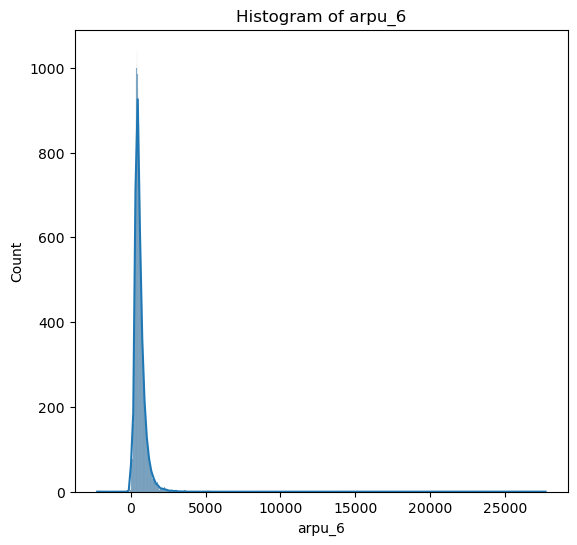


Univariate analysis for column: arpu_7
Mean: 587.4940590446284
Median: 493.207
Variance: 228942.96662613895
Std_dev: 478.4798497597772
Min: -1289.715
Max: 35145.834
Skewness: 23.022687440917146
Kurtosis: 1407.0301430867826


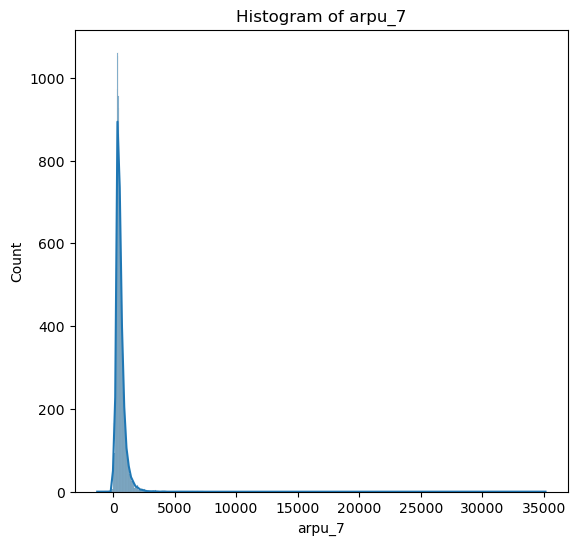


Univariate analysis for column: arpu_8
Mean: 532.9414815396327
Median: 451.818
Variance: 261432.8468883893
Std_dev: 511.30504289356395
Min: -945.808
Max: 33543.624
Skewness: 18.990273209253413
Kurtosis: 980.9581675219052


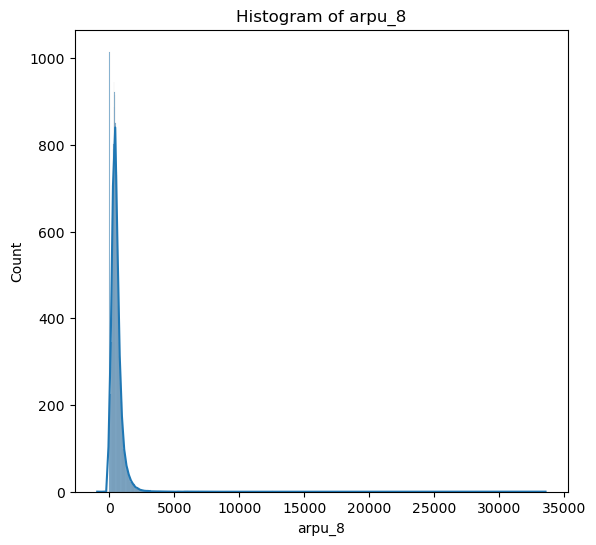


Univariate analysis for column: onnet_mou_6
Mean: 298.1772157198592
Median: 126.36
Variance: 217406.15818500103
Std_dev: 466.2683328138434
Min: 0.0
Max: 7376.71
Skewness: 3.934689361560733
Kurtosis: 26.25993383479635


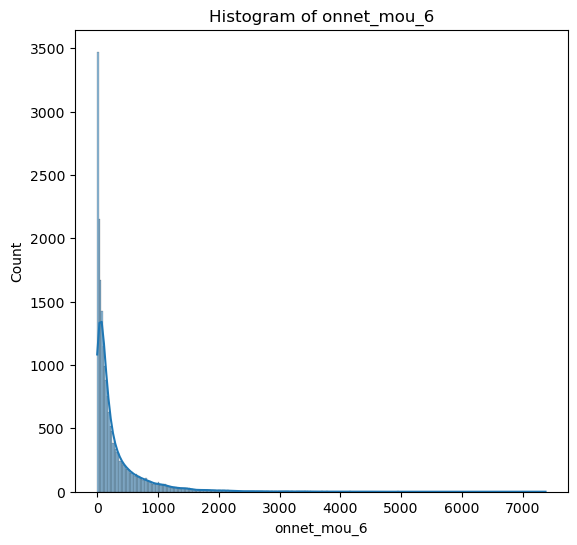


Univariate analysis for column: onnet_mou_7
Mean: 305.2691959273004
Median: 125.42
Variance: 238152.75831176745
Std_dev: 488.00897359758403
Min: 0.0
Max: 8157.78
Skewness: 4.2605931341351475
Kurtosis: 32.26287778385912


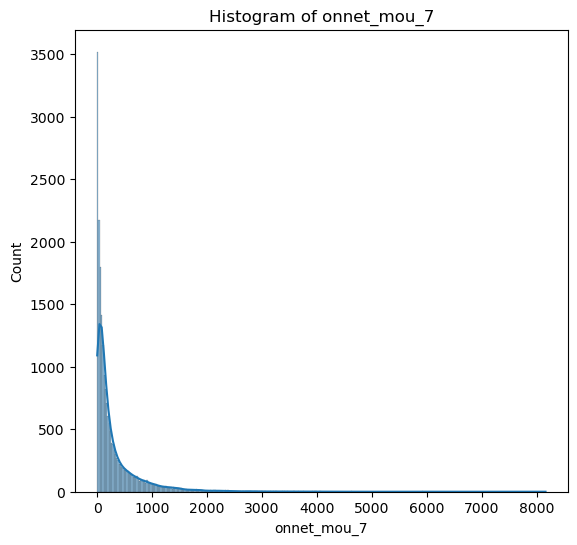


Univariate analysis for column: onnet_mou_8
Mean: 268.15240127509753
Median: 99.44
Variance: 224099.36488398348
Std_dev: 473.39134432727377
Min: 0.0
Max: 10752.56
Skewness: 5.092342196238998
Kurtosis: 50.702711525317234


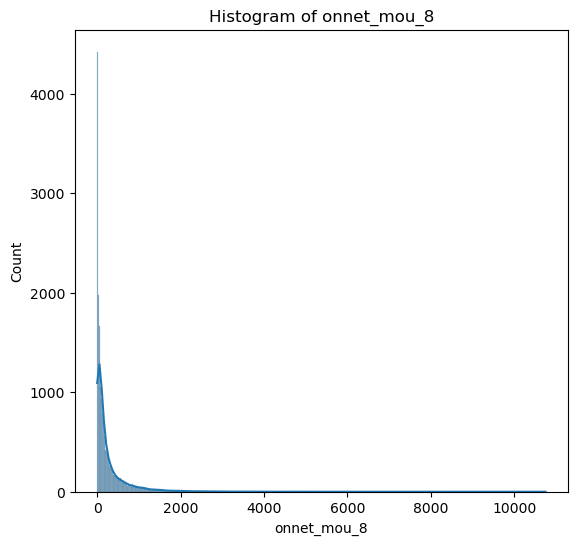


Univariate analysis for column: offnet_mou_6
Mean: 421.4641878389952
Median: 285.25
Variance: 220351.1637161906
Std_dev: 469.4157684997284
Min: 0.0
Max: 8362.36
Skewness: 3.3410125831694932
Kurtosis: 20.261718191821032


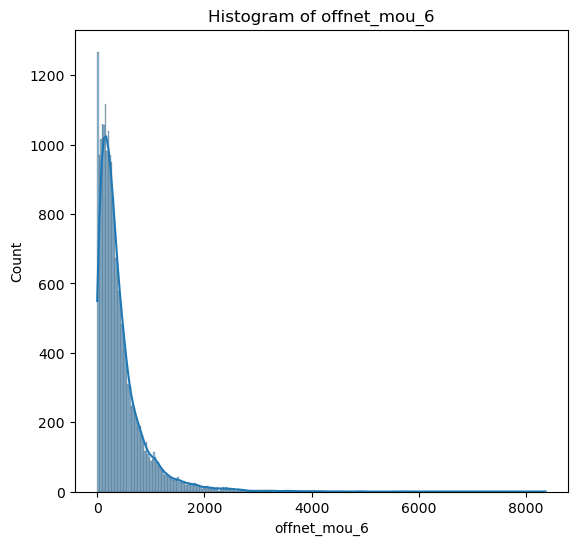


Univariate analysis for column: offnet_mou_7
Mean: 424.3047021600533
Median: 283.02
Variance: 229412.23531485914
Std_dev: 478.9699732914989
Min: 0.0
Max: 7043.98
Skewness: 3.428588893143547
Kurtosis: 20.552042872564755


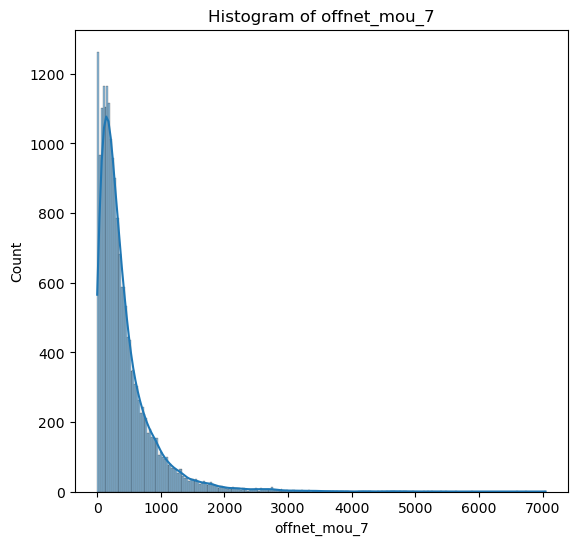


Univariate analysis for column: offnet_mou_8
Mean: 375.2109068417547
Median: 242.47
Variance: 223021.24044428844
Std_dev: 472.2512471601197
Min: 0.0
Max: 14007.34
Skewness: 4.747023959045674
Kurtosis: 58.118461821944294


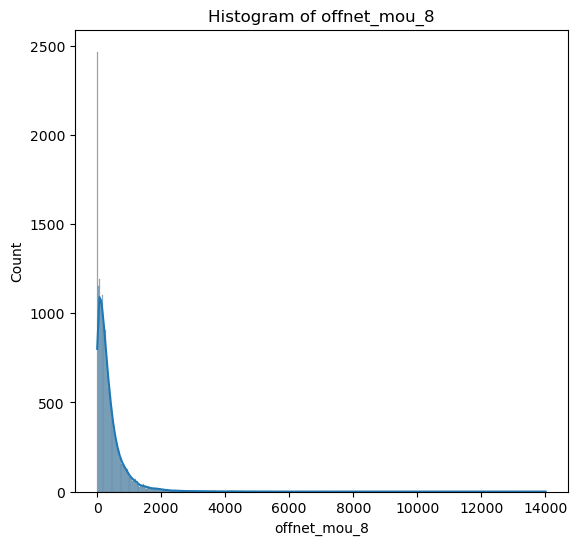


Univariate analysis for column: roam_ic_mou_6
Mean: 17.201005804548483
Median: 0.0
Variance: 6070.362042840213
Std_dev: 77.9125281507423
Min: 0.0
Max: 2613.31
Skewness: 12.145520037429028
Kurtosis: 249.7677897621405


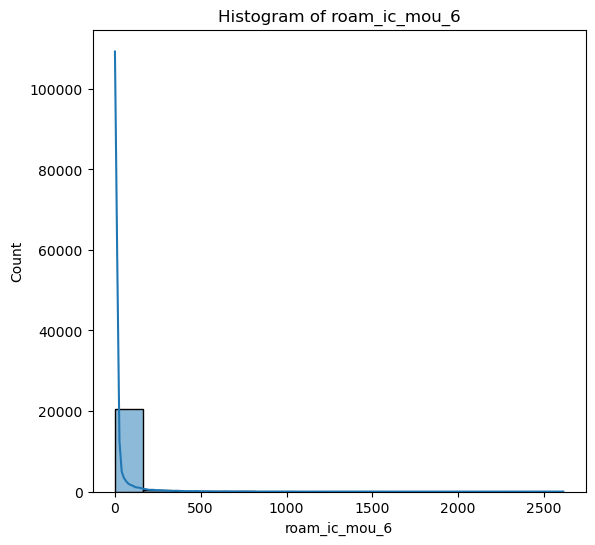


Univariate analysis for column: roam_ic_mou_7
Mean: 13.686279379579407
Median: 0.0
Variance: 6169.311048725517
Std_dev: 78.54496195635667
Min: 0.0
Max: 3813.29
Skewness: 17.8078019429944
Kurtosis: 546.0934545191924


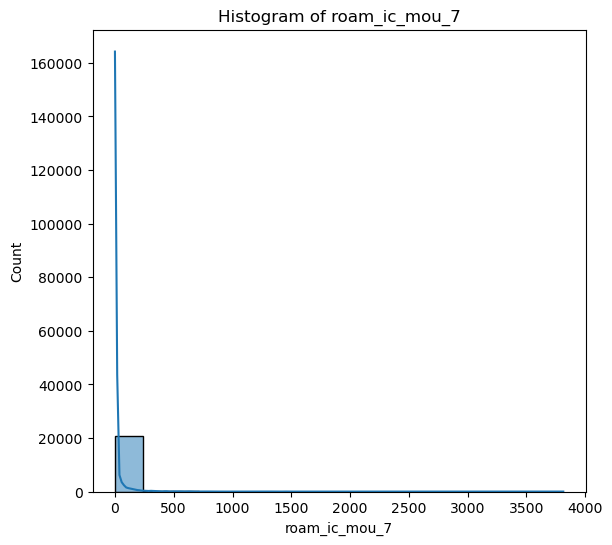


Univariate analysis for column: roam_ic_mou_8
Mean: 12.996392140070416
Median: 0.0
Variance: 5676.248024910703
Std_dev: 75.34087884349839
Min: 0.0
Max: 4169.81
Skewness: 20.111284627923414
Kurtosis: 727.4703901316171


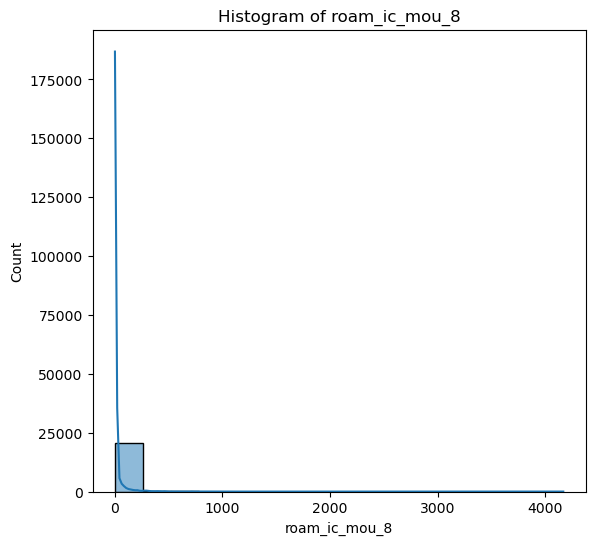


Univariate analysis for column: roam_og_mou_6
Mean: 30.067043010752688
Median: 0.0
Variance: 14917.127082243645
Std_dev: 122.13569127099434
Min: 0.0
Max: 3775.11
Skewness: 9.165638790523063
Kurtosis: 136.1130693324946


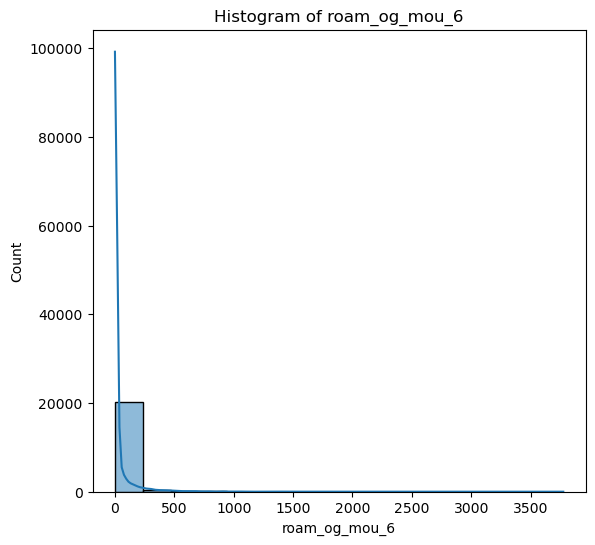


Univariate analysis for column: roam_og_mou_7
Mean: 22.115605195546674
Median: 0.0
Variance: 9607.466428091107
Std_dev: 98.01768426203053
Min: 0.0
Max: 2812.04
Skewness: 9.06119146807354
Kurtosis: 119.30489895330017


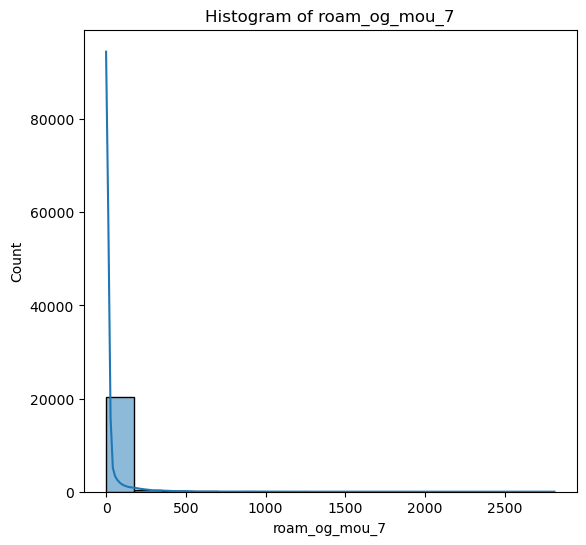


Univariate analysis for column: roam_og_mou_8
Mean: 20.85792891807023
Median: 0.0
Variance: 11230.939073197576
Std_dev: 105.97612501501258
Min: 0.0
Max: 5337.04
Skewness: 15.814697298985873
Kurtosis: 473.7852170903953


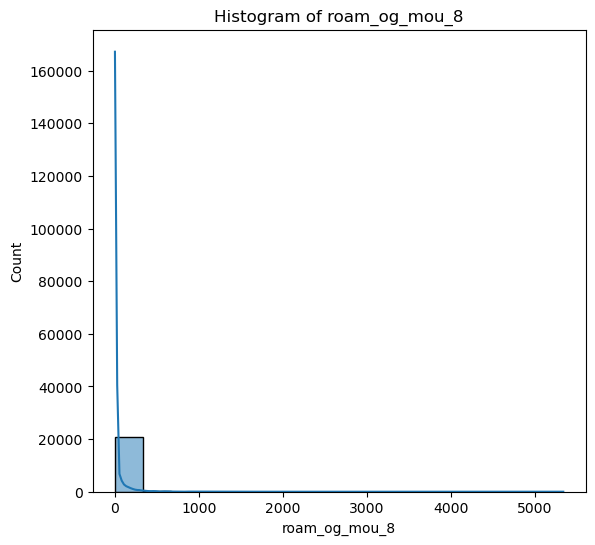


Univariate analysis for column: loc_og_t2t_mou_6
Mean: 94.13091730897327
Median: 32.45
Variance: 56862.466580894674
Std_dev: 238.4585217200146
Min: 0.0
Max: 6431.33
Skewness: 9.346958639069806
Kurtosis: 135.97173645977344


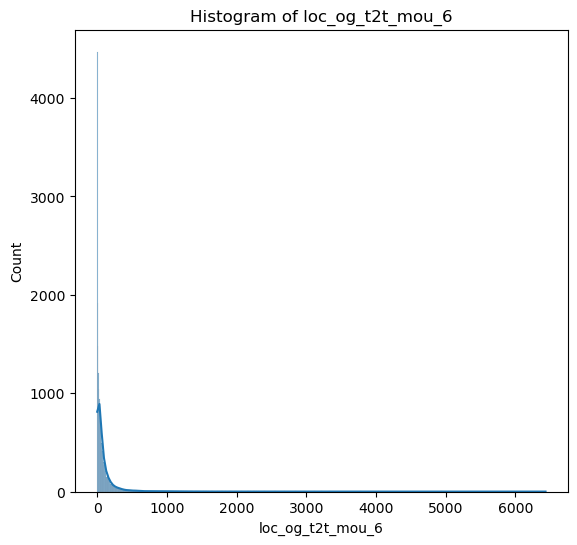


Univariate analysis for column: loc_og_t2t_mou_7
Mean: 95.29614425730325
Median: 33.09
Variance: 62505.635792897985
Std_dev: 250.01127133171013
Min: 0.0
Max: 7400.66
Skewness: 10.319533287884942
Kurtosis: 167.36544440807975


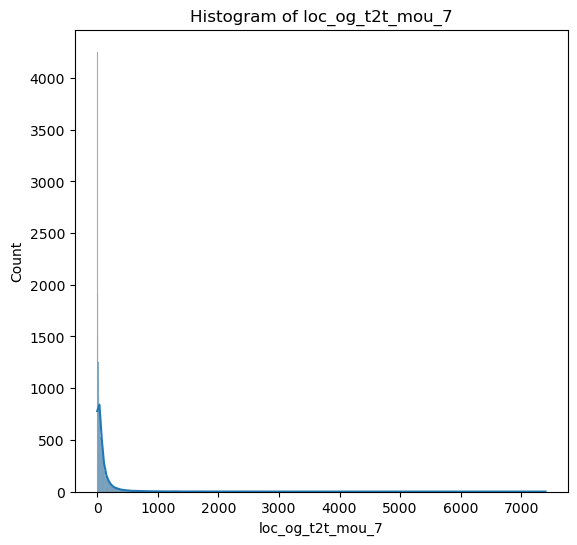


Univariate analysis for column: loc_og_t2t_mou_8
Mean: 86.9184960510039
Median: 28.53
Variance: 57733.18971695335
Std_dev: 240.27731835725433
Min: 0.0
Max: 10752.56
Skewness: 14.407843418985555
Kurtosis: 409.52360606023626


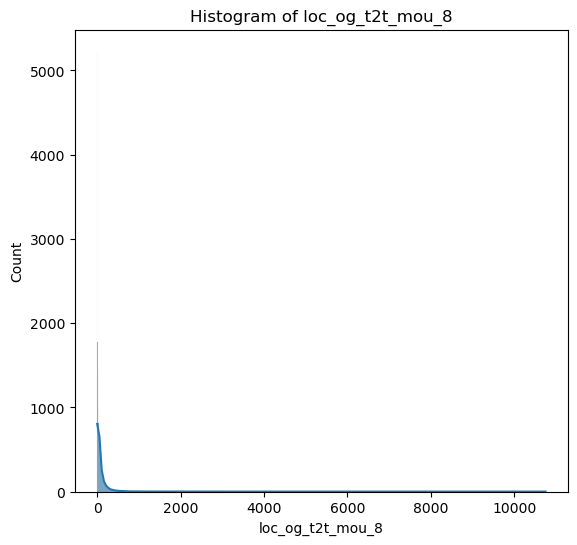


Univariate analysis for column: loc_og_t2m_mou_6
Mean: 180.90262632029692
Median: 100.87
Variance: 61896.54991175765
Std_dev: 248.79017245815328
Min: 0.0
Max: 4696.83
Skewness: 4.178683896077012
Kurtosis: 33.81651231237347


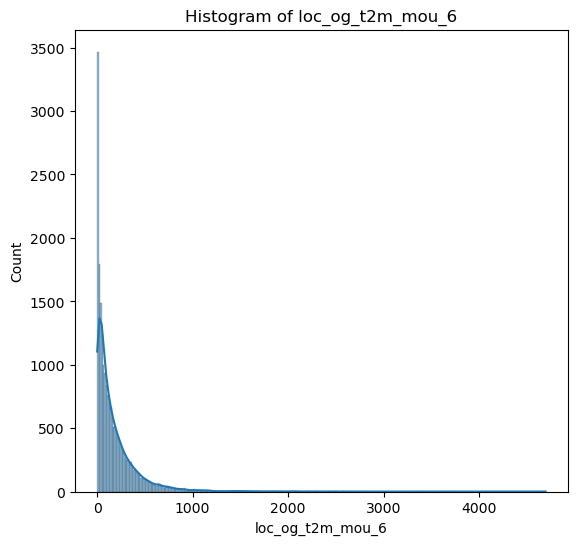


Univariate analysis for column: loc_og_t2m_mou_7
Mean: 179.60568322390333
Median: 104.56
Variance: 54713.781113499426
Std_dev: 233.9097713082962
Min: 0.0
Max: 4557.14
Skewness: 3.618422739567107
Kurtosis: 25.175007526123267


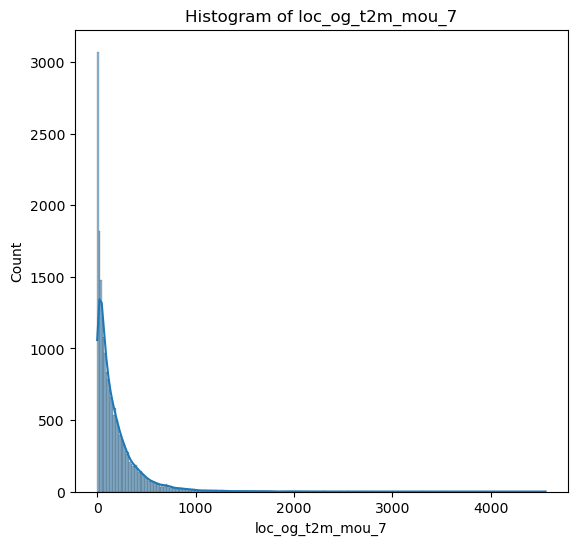


Univariate analysis for column: loc_og_t2m_mou_8
Mean: 165.87522361785136
Median: 89.94999999999999
Variance: 52453.87581345516
Std_dev: 229.02811140437578
Min: 0.0
Max: 4961.33
Skewness: 3.9261807723493827
Kurtosis: 33.50669855718501


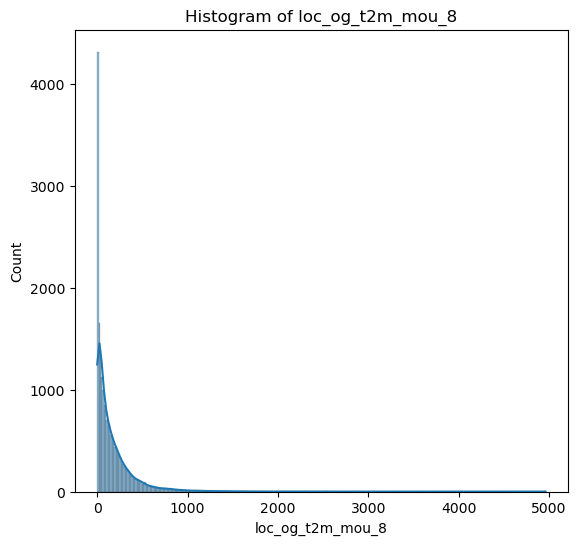


Univariate analysis for column: loc_og_t2f_mou_6
Mean: 6.916292701493958
Median: 0.31
Variance: 436.0630614134566
Std_dev: 20.882123010207955
Min: 0.0
Max: 617.58
Skewness: 9.616094029737898
Kurtosis: 163.97452615228406


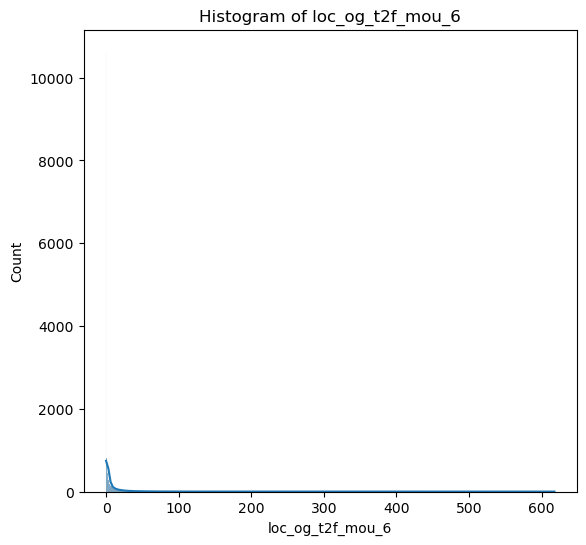


Univariate analysis for column: loc_og_t2f_mou_7
Mean: 7.04225616138548
Median: 0.38
Variance: 452.50090341216236
Std_dev: 21.272068620897272
Min: 0.0
Max: 815.33
Skewness: 10.211474560215267
Kurtosis: 203.62013152833998


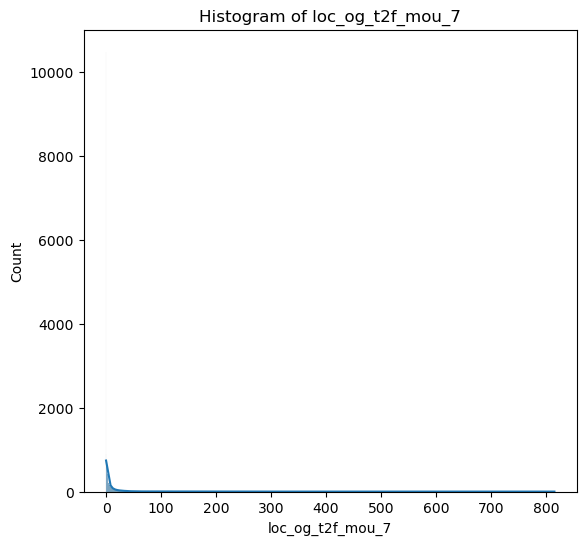


Univariate analysis for column: loc_og_t2f_mou_8
Mean: 6.465886858882861
Median: 0.13
Variance: 393.1065185667317
Std_dev: 19.82691399504047
Min: 0.0
Max: 588.29
Skewness: 9.79194382590824
Kurtosis: 172.7325851695156


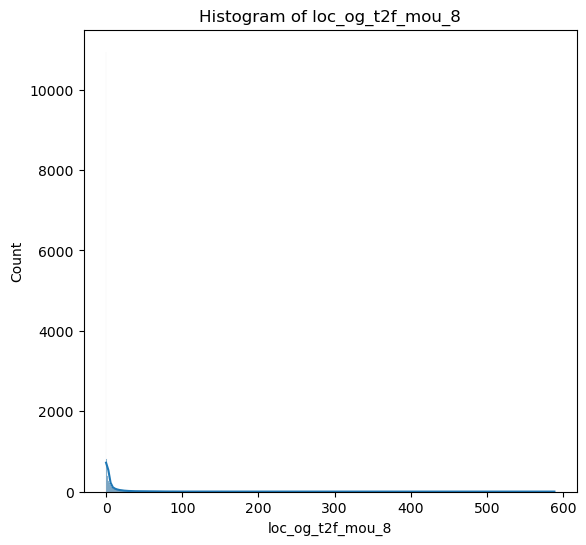


Univariate analysis for column: loc_og_t2c_mou_6
Mean: 1.5939142639642212
Median: 0.0
Variance: 55.088496078123015
Std_dev: 7.42216249337907
Min: 0.0
Max: 342.86
Skewness: 18.938078220633727
Kurtosis: 621.2331289561265


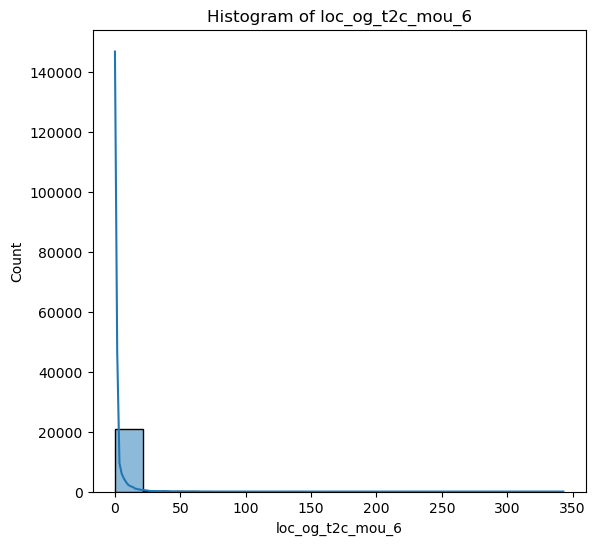


Univariate analysis for column: loc_og_t2c_mou_7
Mean: 1.8291174231611
Median: 0.0
Variance: 88.45020699093493
Std_dev: 9.404797020187885
Min: 0.0
Max: 569.71
Skewness: 27.84854127589836
Kurtosis: 1264.8224970469444


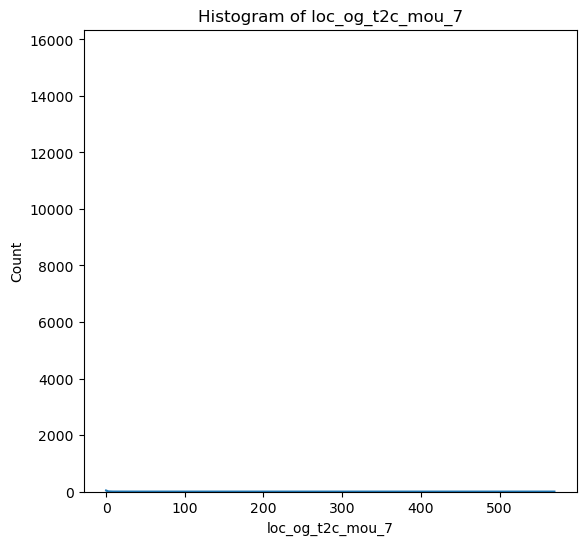


Univariate analysis for column: loc_og_t2c_mou_8
Mean: 1.6804971928822914
Median: 0.0
Variance: 52.94830528162169
Std_dev: 7.276558615281107
Min: 0.0
Max: 351.83
Skewness: 16.70876072199086
Kurtosis: 523.7609488173624


KeyboardInterrupt: 

In [187]:
analysis_results = univariate_analysis(df, numerical_columns)

#### Univariate Analysis


In [60]:

def univariate_categorical_analysis(df, categorical_columns):
    analysis_results = {}
    
    for column in categorical_columns:
        print(f"\nUnivariate analysis for column: {column}")
        
        # Frequency distribution
        freq_dist = df[column].value_counts()
        
        # Proportion of each category
        proportion = df[column].value_counts(normalize=True)
        
        analysis_results[column] = {
            'frequency': freq_dist,
            'proportion': proportion
        }
        
        print("Frequency Distribution:")
        print(freq_dist)
        
        print("\nProportion of Each Category:")
        print(proportion)
        
        # Plotting
        plt.figure(figsize=(14, 6))
        
        # Bar Plot
        plt.subplot(1, 2, 1)
        sns.countplot(x=df[column], order=freq_dist.index, palette="viridis")
        plt.title(f'Bar Plot of {column}')
        plt.xticks(rotation=45)
        
       
        
        plt.show()
    
    return analysis_results




Univariate analysis for column: monthly_2g_6
Frequency Distribution:
monthly_2g_6
0    18713
1     2054
2      227
3       18
4        6
Name: count, dtype: int64

Proportion of Each Category:
monthly_2g_6
0    0.890332
1    0.097726
2    0.010800
3    0.000856
4    0.000285
Name: proportion, dtype: float64


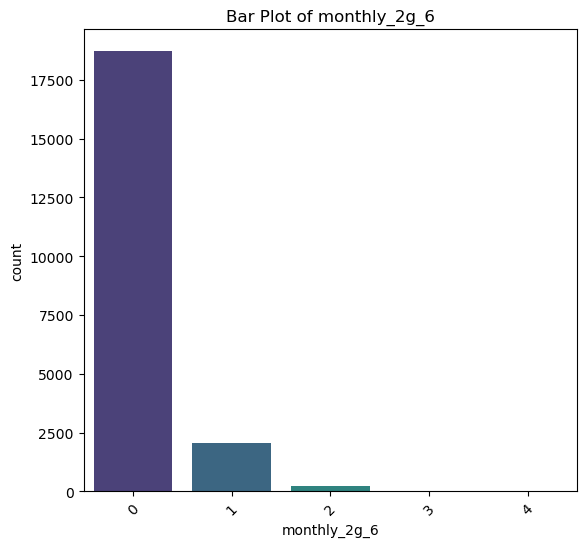


Univariate analysis for column: monthly_2g_7
Frequency Distribution:
monthly_2g_7
0    18599
1     2116
2      275
3       24
4        3
5        1
Name: count, dtype: int64

Proportion of Each Category:
monthly_2g_7
0    0.884908
1    0.100676
2    0.013084
3    0.001142
4    0.000143
5    0.000048
Name: proportion, dtype: float64


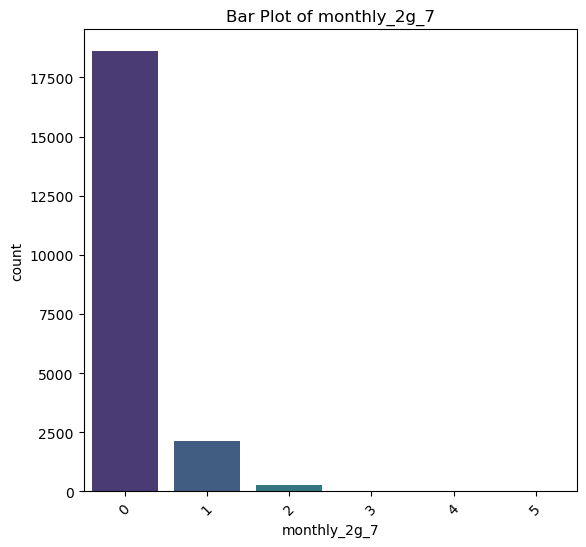


Univariate analysis for column: monthly_2g_8
Frequency Distribution:
monthly_2g_8
0    18889
1     1918
2      191
3       16
4        3
5        1
Name: count, dtype: int64

Proportion of Each Category:
monthly_2g_8
0    0.898706
1    0.091255
2    0.009087
3    0.000761
4    0.000143
5    0.000048
Name: proportion, dtype: float64


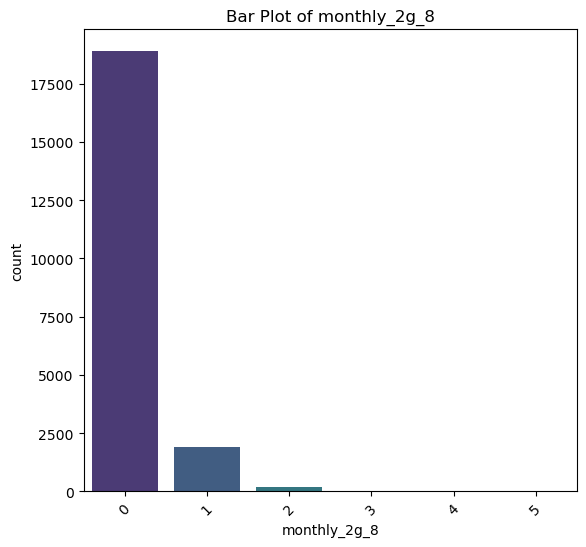


Univariate analysis for column: sachet_2g_6
Frequency Distribution:
sachet_2g_6
0     17389
1      1640
2       718
3       421
4       263
5       146
6       101
7        75
8        60
9        47
10       35
12       33
11       21
13       12
14       11
15        9
17        8
19        7
16        6
18        4
21        3
25        3
22        2
24        1
30        1
32        1
34        1
20        0
28        0
42        0
Name: count, dtype: int64

Proportion of Each Category:
sachet_2g_6
0     0.827338
1     0.078028
2     0.034161
3     0.020030
4     0.012513
5     0.006946
6     0.004805
7     0.003568
8     0.002855
9     0.002236
10    0.001665
12    0.001570
11    0.000999
13    0.000571
14    0.000523
15    0.000428
17    0.000381
19    0.000333
16    0.000285
18    0.000190
21    0.000143
25    0.000143
22    0.000095
24    0.000048
30    0.000048
32    0.000048
34    0.000048
20    0.000000
28    0.000000
42    0.000000
Name: proportion, dtype: float64


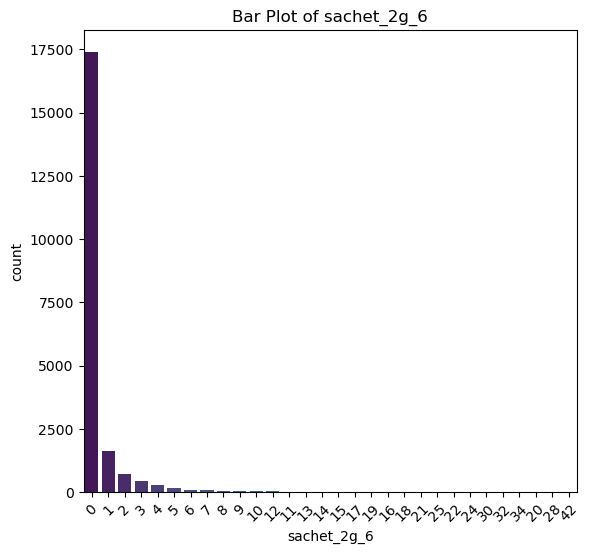


Univariate analysis for column: sachet_2g_7
Frequency Distribution:
sachet_2g_7
0     17233
1      1550
2       661
3       413
4       305
5       247
6       179
7       122
8        80
10       50
9        41
11       33
12       20
14       15
15       13
13       10
19        6
20        6
18        6
16        5
17        5
26        3
27        3
21        2
22        2
23        2
25        1
30        1
32        1
35        1
42        1
48        1
24        0
Name: count, dtype: int64

Proportion of Each Category:
sachet_2g_7
0     0.819916
1     0.073746
2     0.031449
3     0.019650
4     0.014511
5     0.011752
6     0.008517
7     0.005805
8     0.003806
10    0.002379
9     0.001951
11    0.001570
12    0.000952
14    0.000714
15    0.000619
13    0.000476
19    0.000285
20    0.000285
18    0.000285
16    0.000238
17    0.000238
26    0.000143
27    0.000143
21    0.000095
22    0.000095
23    0.000095
25    0.000048
30    0.000048
32    0.000048
35    0.000048
42   

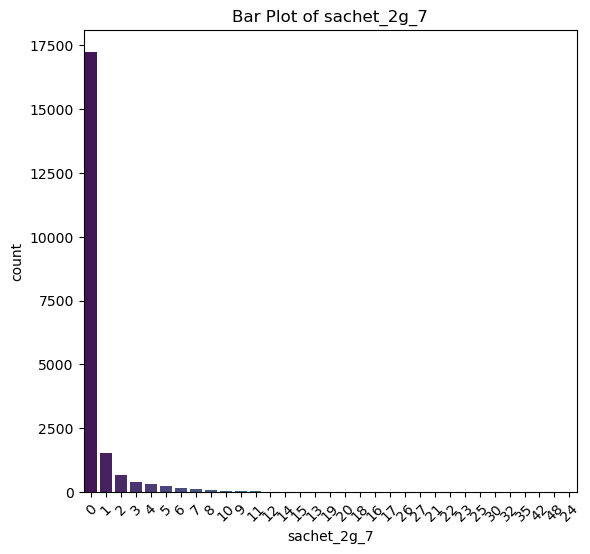


Univariate analysis for column: sachet_2g_8
Frequency Distribution:
sachet_2g_8
0     16764
1      1896
2       670
3       450
4       393
5       298
6       184
7        90
8        69
9        47
10       33
11       26
12       23
15       12
14       11
13       10
16        9
18        6
17        5
19        4
20        4
22        2
24        2
27        2
29        2
21        1
23        1
31        1
32        1
34        1
44        1
25        0
Name: count, dtype: int64

Proportion of Each Category:
sachet_2g_8
0     0.797602
1     0.090208
2     0.031877
3     0.021410
4     0.018698
5     0.014178
6     0.008754
7     0.004282
8     0.003283
9     0.002236
10    0.001570
11    0.001237
12    0.001094
15    0.000571
14    0.000523
13    0.000476
16    0.000428
18    0.000285
17    0.000238
19    0.000190
20    0.000190
22    0.000095
24    0.000095
27    0.000095
29    0.000095
21    0.000048
23    0.000048
31    0.000048
32    0.000048
34    0.000048
44    0.000048
25

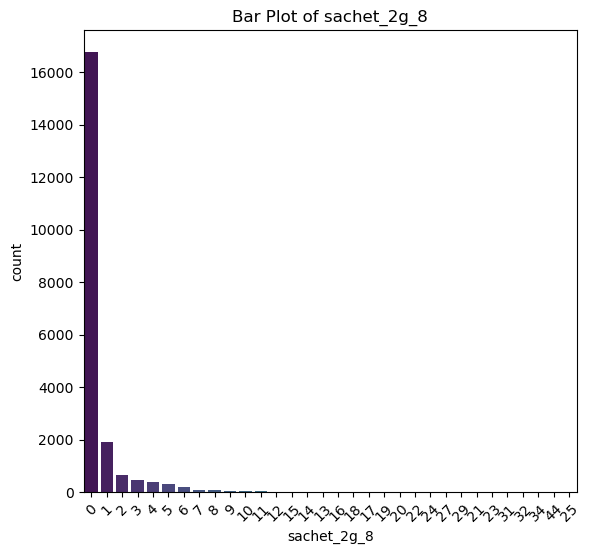


Univariate analysis for column: monthly_3g_6
Frequency Distribution:
monthly_3g_6
0    18533
1     1770
2      476
3      145
4       58
5       15
6        9
7        8
8        2
9        2
Name: count, dtype: int64

Proportion of Each Category:
monthly_3g_6
0    0.881768
1    0.084214
2    0.022647
3    0.006899
4    0.002760
5    0.000714
6    0.000428
7    0.000381
8    0.000095
9    0.000095
Name: proportion, dtype: float64


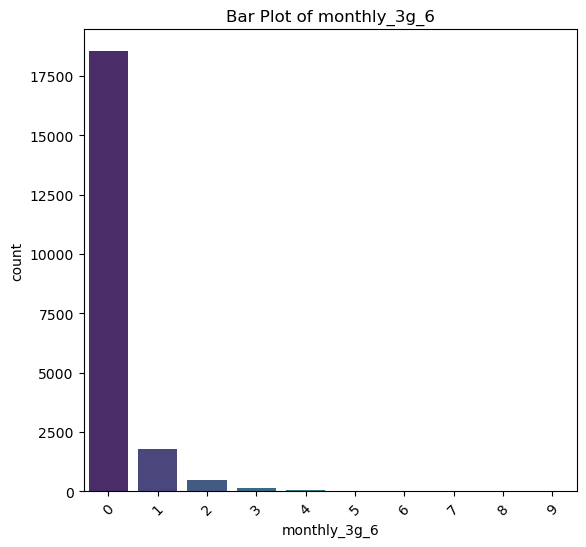


Univariate analysis for column: monthly_3g_7
Frequency Distribution:
monthly_3g_7
0     18495
1      1698
2       575
3       148
4        44
5        25
6        17
7         6
8         4
9         3
10        1
14        1
16        1
Name: count, dtype: int64

Proportion of Each Category:
monthly_3g_7
0     0.879960
1     0.080788
2     0.027358
3     0.007042
4     0.002093
5     0.001189
6     0.000809
7     0.000285
8     0.000190
9     0.000143
10    0.000048
14    0.000048
16    0.000048
Name: proportion, dtype: float64


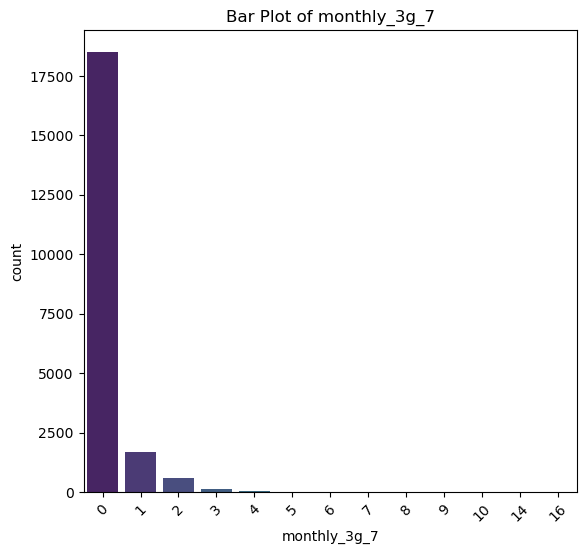


Univariate analysis for column: monthly_3g_8
Frequency Distribution:
monthly_3g_8
0     18625
1      1647
2       505
3       144
4        56
5        22
6         7
7         5
8         3
9         2
10        1
16        1
Name: count, dtype: int64

Proportion of Each Category:
monthly_3g_8
0     0.886145
1     0.078361
2     0.024027
3     0.006851
4     0.002664
5     0.001047
6     0.000333
7     0.000238
8     0.000143
9     0.000095
10    0.000048
16    0.000048
Name: proportion, dtype: float64


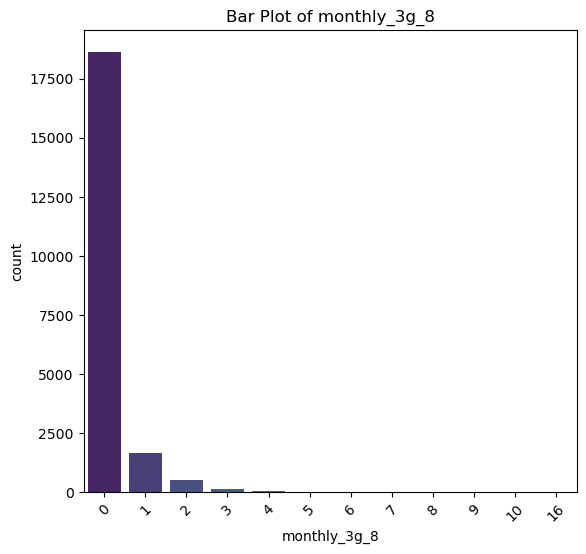


Univariate analysis for column: sachet_3g_6
Frequency Distribution:
sachet_3g_6
0     19638
1       898
2       222
3        81
4        47
5        25
7        25
6        20
8        13
9        11
11        7
10        6
15        4
12        3
13        3
14        3
19        3
23        3
29        2
16        1
17        1
18        1
22        1
Name: count, dtype: int64

Proportion of Each Category:
sachet_3g_6
0     0.934342
1     0.042725
2     0.010562
3     0.003854
4     0.002236
5     0.001189
7     0.001189
6     0.000952
8     0.000619
9     0.000523
11    0.000333
10    0.000285
15    0.000190
12    0.000143
13    0.000143
14    0.000143
19    0.000143
23    0.000143
29    0.000095
16    0.000048
17    0.000048
18    0.000048
22    0.000048
Name: proportion, dtype: float64


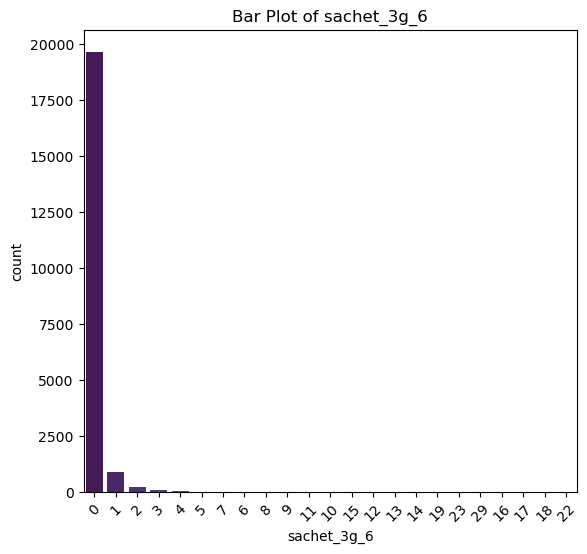


Univariate analysis for column: sachet_3g_7
Frequency Distribution:
sachet_3g_7
0     19633
1       868
2       218
3        84
4        50
5        45
6        30
7        14
11       11
9        11
8        10
10        9
12        8
14        4
20        3
15        3
22        3
18        3
24        2
13        2
17        2
19        1
21        1
16        1
31        1
33        1
Name: count, dtype: int64

Proportion of Each Category:
sachet_3g_7
0     0.934104
1     0.041298
2     0.010372
3     0.003997
4     0.002379
5     0.002141
6     0.001427
7     0.000666
11    0.000523
9     0.000523
8     0.000476
10    0.000428
12    0.000381
14    0.000190
20    0.000143
15    0.000143
22    0.000143
18    0.000143
24    0.000095
13    0.000095
17    0.000095
19    0.000048
21    0.000048
16    0.000048
31    0.000048
33    0.000048
Name: proportion, dtype: float64


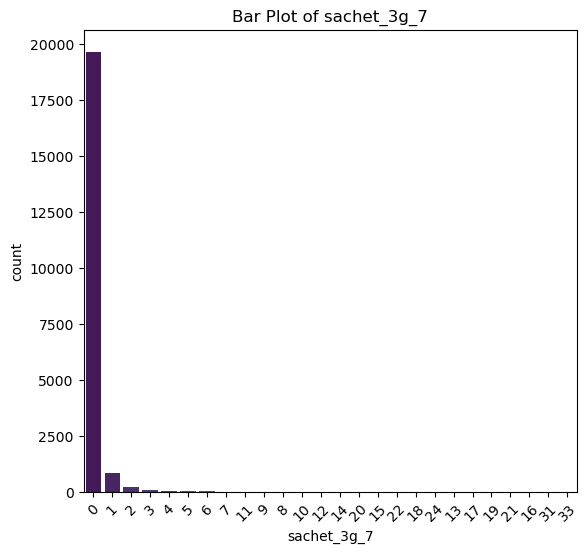


Univariate analysis for column: sachet_3g_8
Frequency Distribution:
sachet_3g_8
0     19806
1       746
2       178
3        84
4        47
5        45
6        20
8        16
7        15
12        8
13        8
9         8
10        8
11        6
15        3
20        2
23        2
21        2
14        2
18        2
17        2
16        2
19        1
25        1
29        1
30        1
38        1
41        1
Name: count, dtype: int64

Proportion of Each Category:
sachet_3g_8
0     0.942335
1     0.035493
2     0.008469
3     0.003997
4     0.002236
5     0.002141
6     0.000952
8     0.000761
7     0.000714
12    0.000381
13    0.000381
9     0.000381
10    0.000381
11    0.000285
15    0.000143
20    0.000095
23    0.000095
21    0.000095
14    0.000095
18    0.000095
17    0.000095
16    0.000095
19    0.000048
25    0.000048
29    0.000048
30    0.000048
38    0.000048
41    0.000048
Name: proportion, dtype: float64


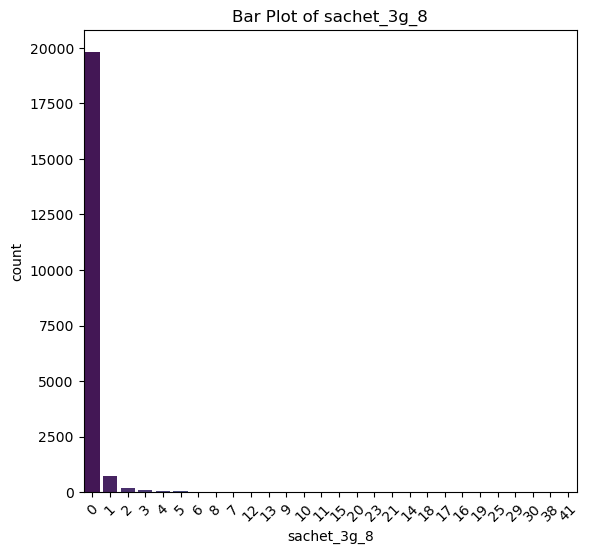


Univariate analysis for column: churn_probability
Frequency Distribution:
churn_probability
0    19159
1     1859
Name: count, dtype: int64

Proportion of Each Category:
churn_probability
0    0.911552
1    0.088448
Name: proportion, dtype: float64


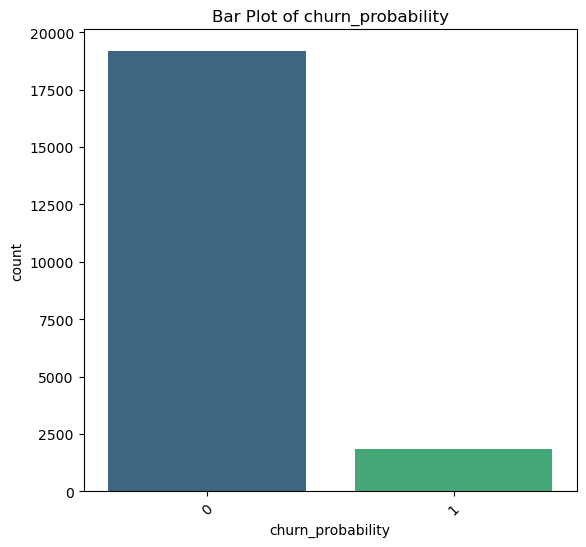

In [63]:
analysis_results = univariate_categorical_analysis(df, categorical_columns)

### Bivariate Analysis

In [64]:
def bivariate_analysis_numerical(df, target_column, numerical_columns):
    for column in numerical_columns:
        print(f"\nBivariate analysis between {target_column} and {column}")
        
        # Calculate correlation
        correlation = df[[target_column, column]].corr().iloc[0, 1]
        print(f"Correlation between {target_column} and {column}: {correlation}")
        
        # Scatter Plot
        plt.figure(figsize=(14, 6))
        plt.subplot(1, 2, 1)
        sns.scatterplot(x=df[column], y=df[target_column], hue=df[target_column], palette="viridis")
        plt.title(f'Scatter Plot between {target_column} and {column}')
        
        # Box Plot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[target_column], y=df[column], palette="viridis")
        plt.title(f'Box Plot of {column} by {target_column}')
        
        plt.show()


In [68]:
categorical_columns

array(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'churn_probability'], dtype=object)

In [ ]:
categorical_columns

In [69]:
def bivariate_analysis_categorical(df, target_column, categorical_columns):
    for column in categorical_columns:
        print(f"\nBivariate analysis between {target_column} and {column}")
        
        # Cross-tabulation for target and categorical variable
        cross_tab = pd.crosstab(df[column], df[target_column], normalize='index')
        print("Cross Tabulation:")
        print(cross_tab)
        
        # Bar Plot
        plt.figure(figsize=(14, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=column, hue=target_column, data=df, palette="viridis")
        plt.title(f'Bar Plot of {column} by {target_column}')
        plt.xticks(rotation=45)
        
        # Box Plot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column], y=df[target_column], palette="viridis")
        plt.title(f'Box Plot of {target_column} by {column}')
        
        plt.show()


In [71]:
categorical_columns

array(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'churn_probability'], dtype=object)

In [73]:
unique_values = df['churn_probability'].unique()
print("Unique values in 'churn_probability':", unique_values)

Unique values in 'churn_probability': [0, 1]
Categories (2, int64): [0, 1]


In [74]:
df['churn_probability'] = pd.to_numeric(df['churn_probability'], errors='coerce')



Bivariate analysis between churn_probability and monthly_2g_6
Correlation between churn_probability and monthly_2g_6: -0.05444232100149243


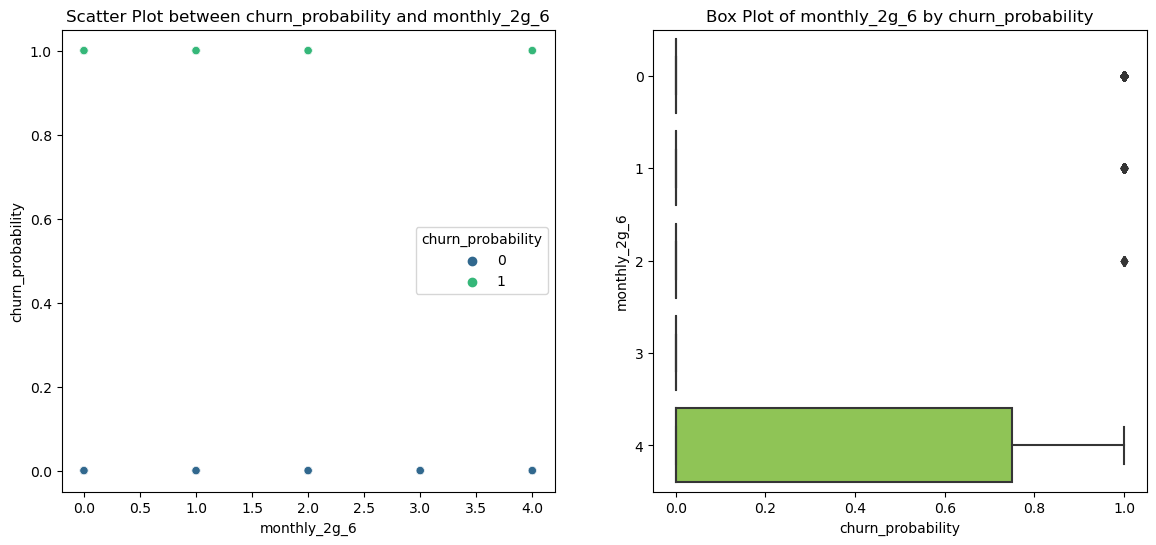


Bivariate analysis between churn_probability and monthly_2g_7
Correlation between churn_probability and monthly_2g_7: -0.0644128207845453


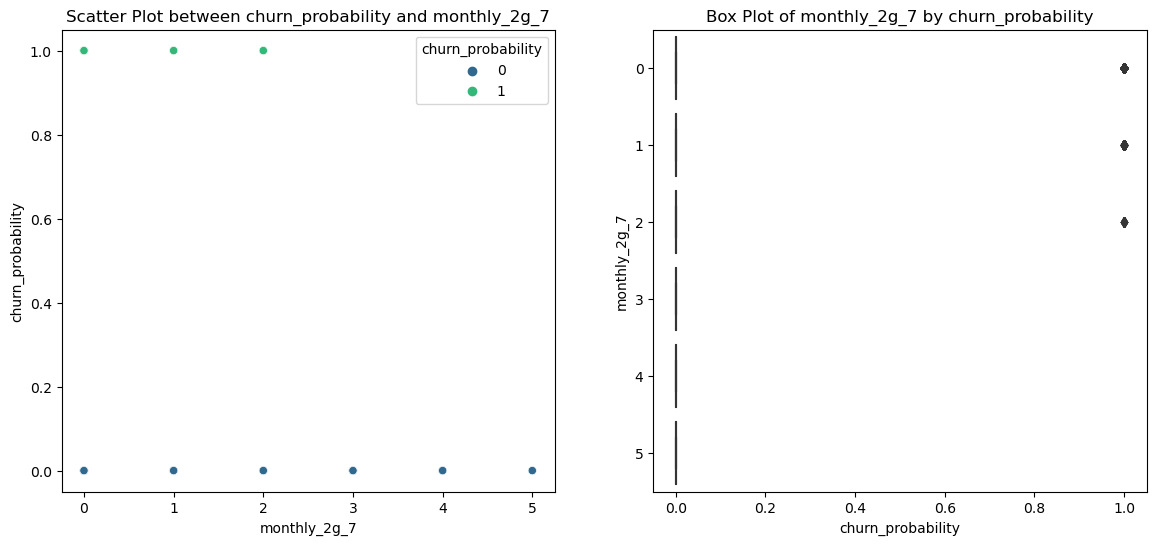


Bivariate analysis between churn_probability and monthly_2g_8
Correlation between churn_probability and monthly_2g_8: -0.08766912065257439


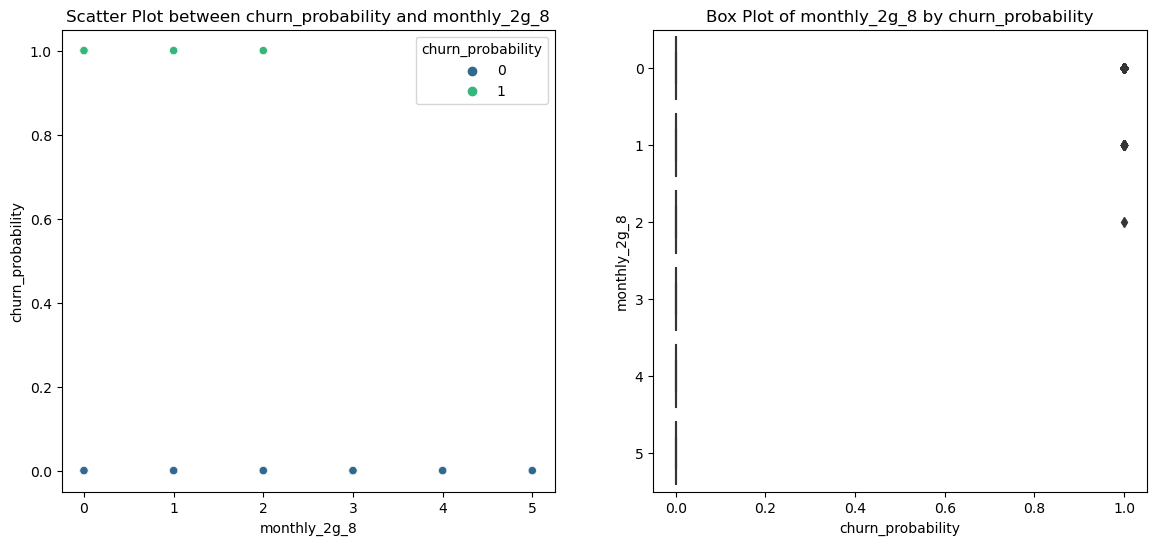


Bivariate analysis between churn_probability and sachet_2g_6
Correlation between churn_probability and sachet_2g_6: -0.015303119807215649


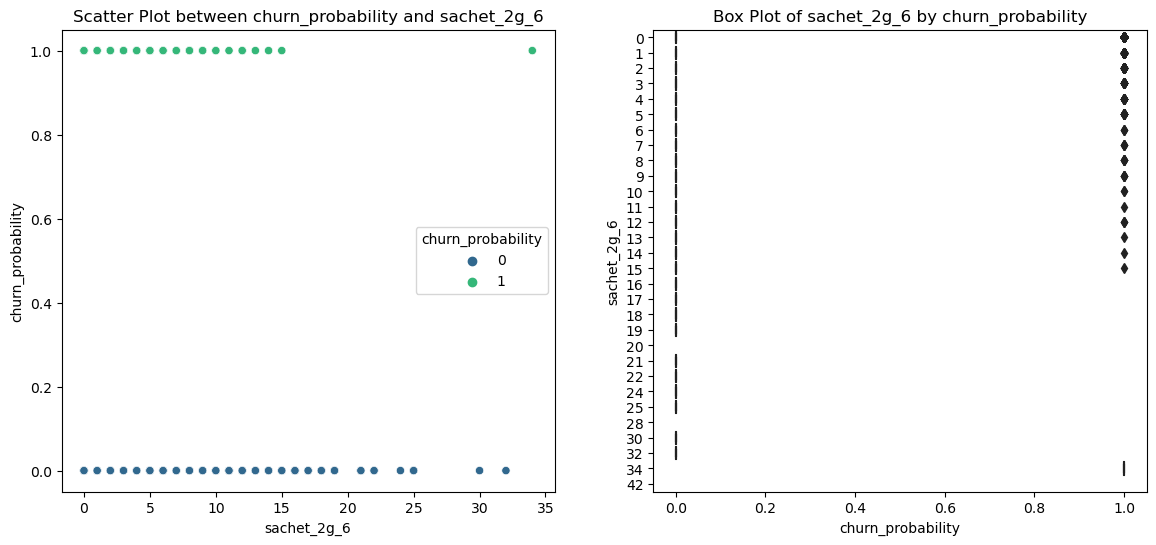


Bivariate analysis between churn_probability and sachet_2g_7
Correlation between churn_probability and sachet_2g_7: -0.023700809857946828


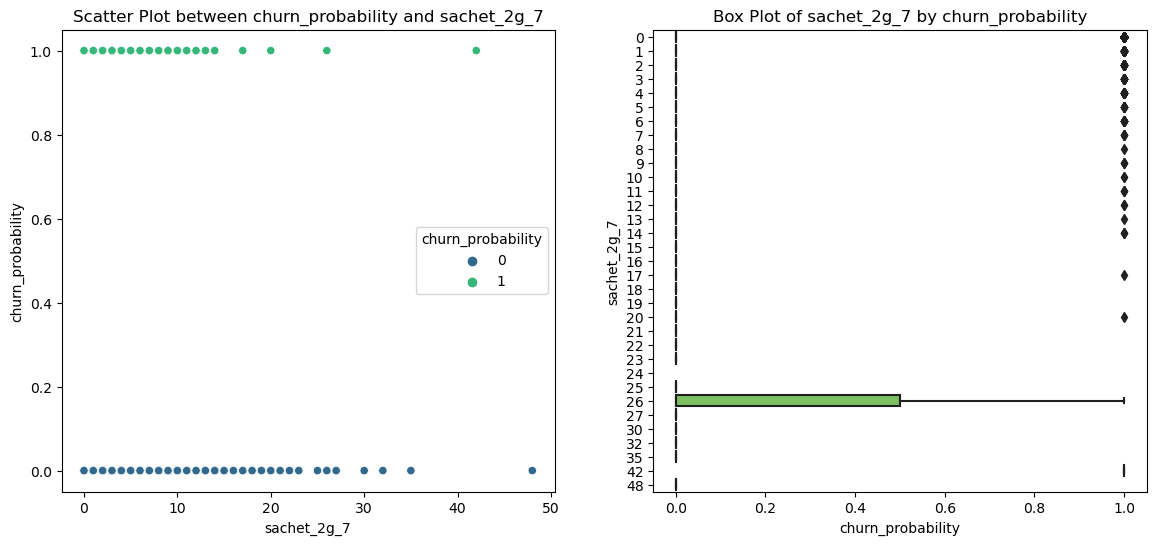


Bivariate analysis between churn_probability and sachet_2g_8
Correlation between churn_probability and sachet_2g_8: -0.06966315486913324


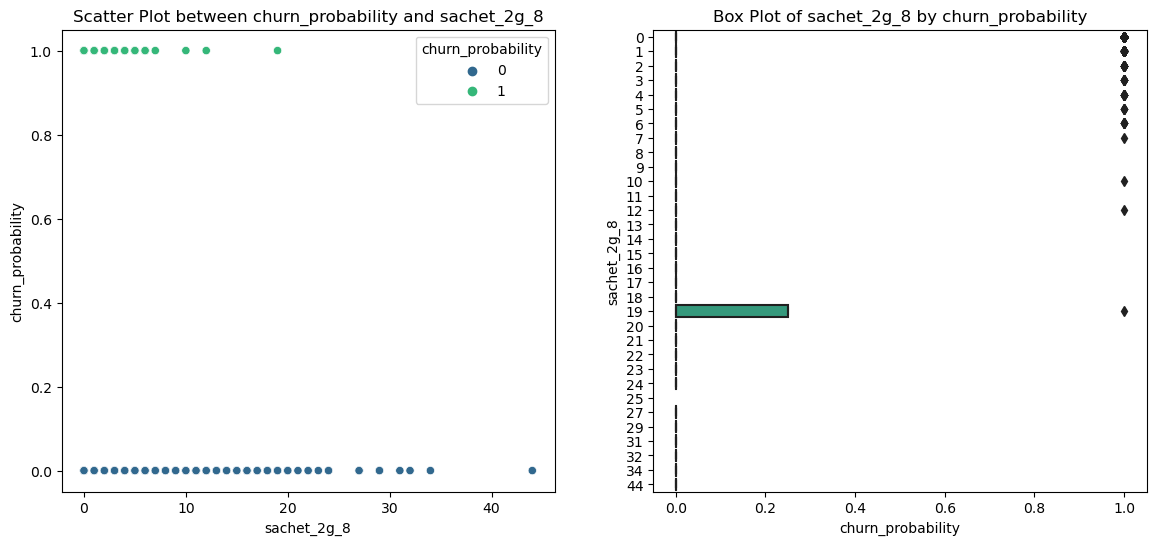


Bivariate analysis between churn_probability and monthly_3g_6
Correlation between churn_probability and monthly_3g_6: -0.019966651425749805


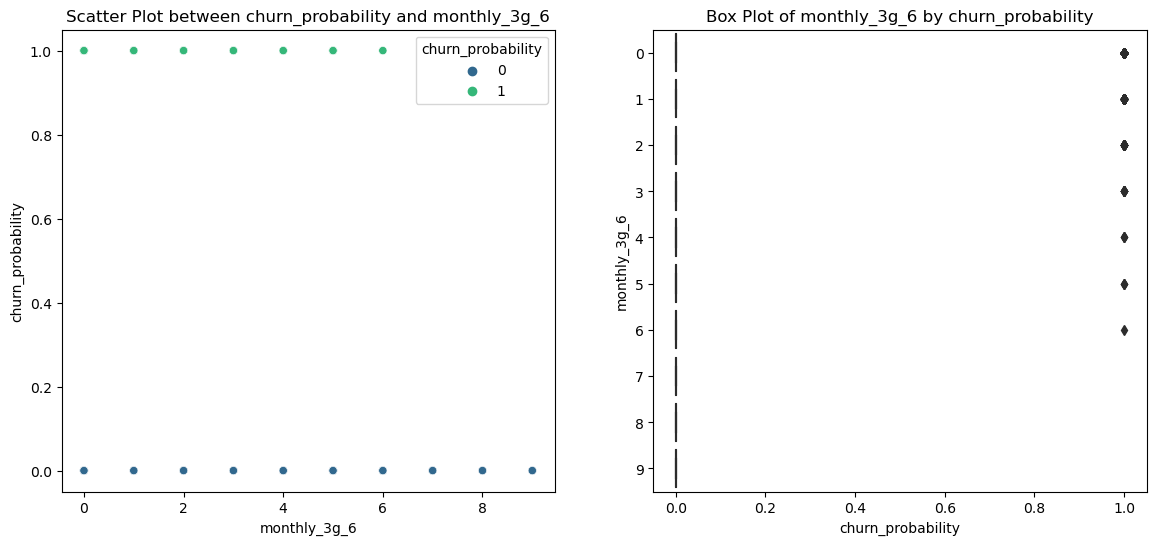


Bivariate analysis between churn_probability and monthly_3g_7
Correlation between churn_probability and monthly_3g_7: -0.04185271522435549


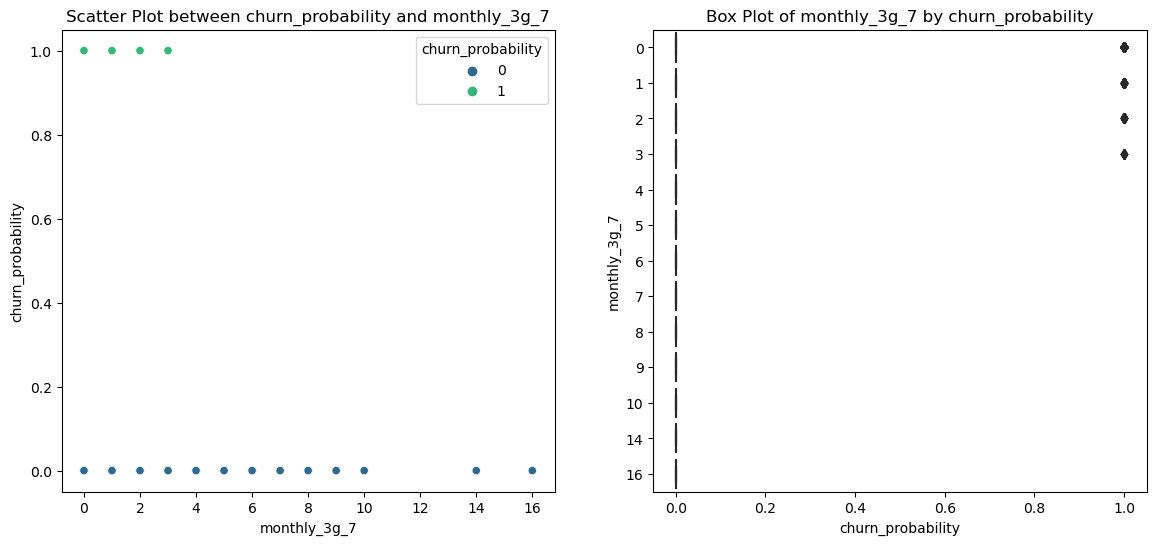


Bivariate analysis between churn_probability and monthly_3g_8
Correlation between churn_probability and monthly_3g_8: -0.07183253146095651


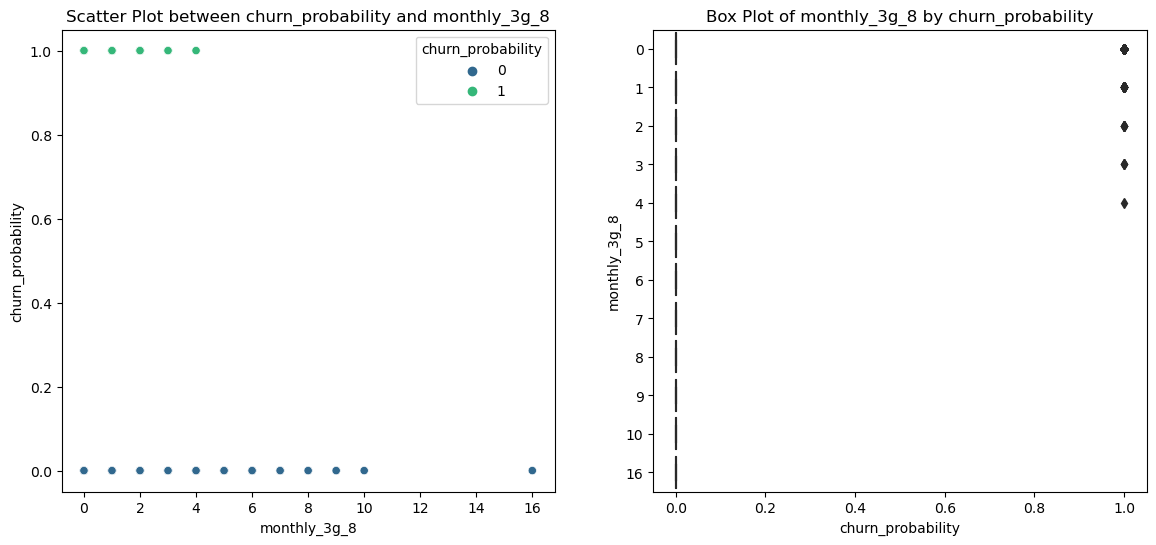


Bivariate analysis between churn_probability and sachet_3g_6
Correlation between churn_probability and sachet_3g_6: -0.008158140998739405


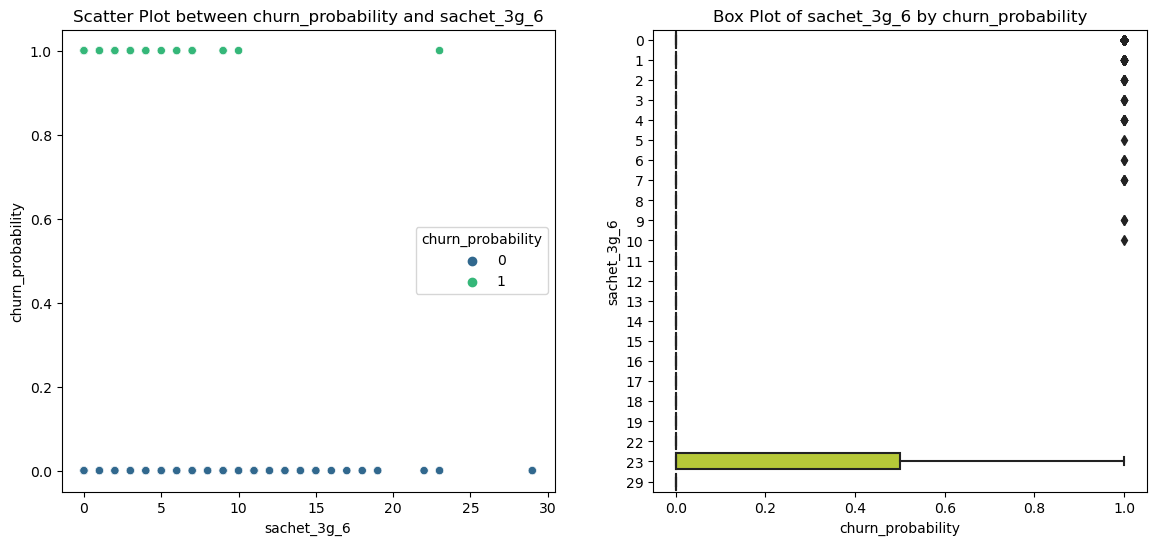


Bivariate analysis between churn_probability and sachet_3g_7
Correlation between churn_probability and sachet_3g_7: -0.00888313351615976


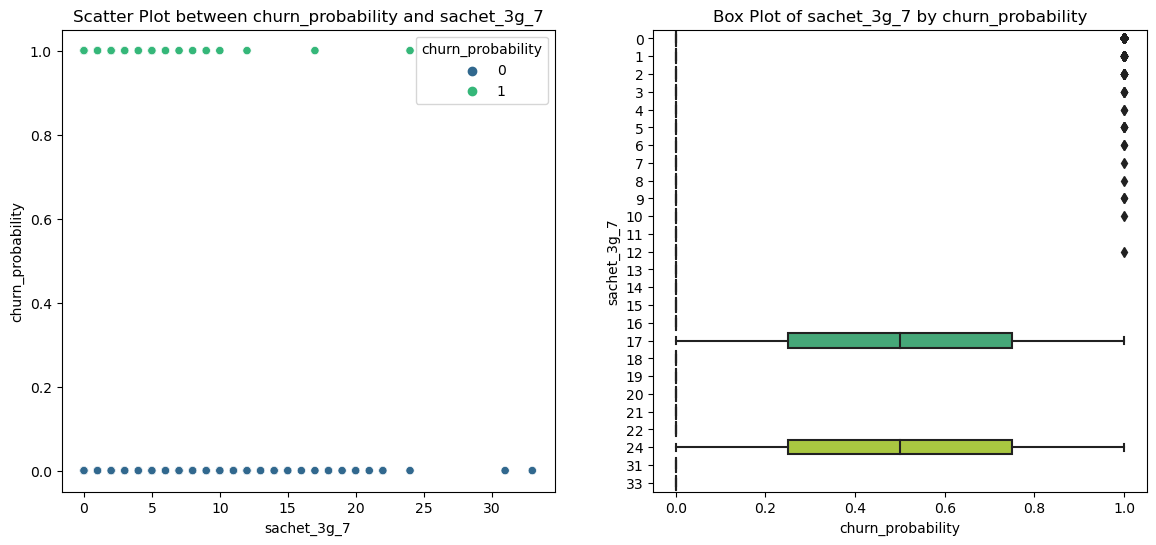


Bivariate analysis between churn_probability and sachet_3g_8
Correlation between churn_probability and sachet_3g_8: -0.03168407759303755


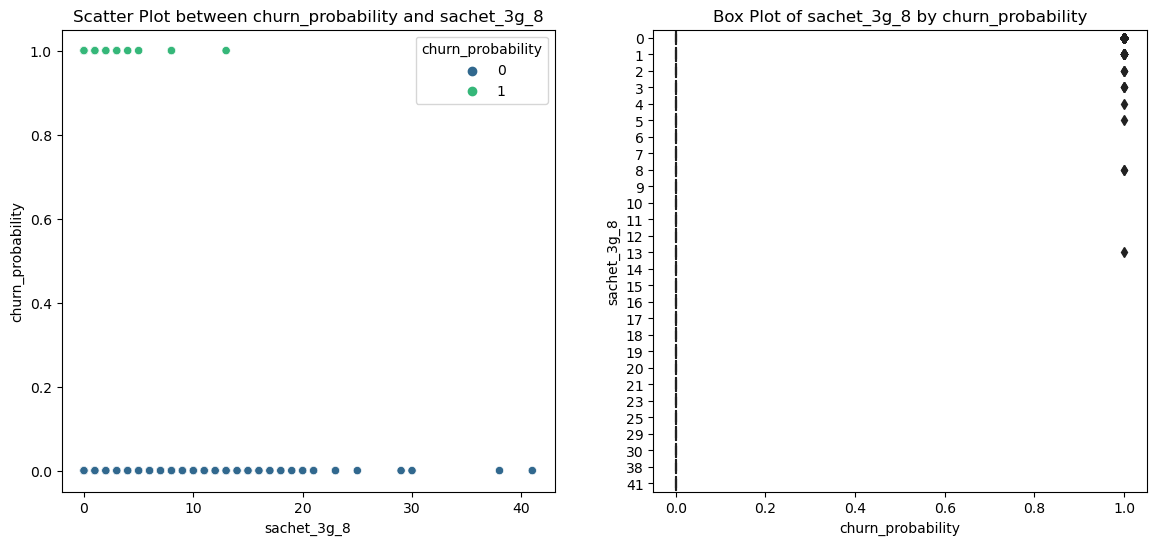

In [75]:

def bivariate_analysis(df, target_column, columns):
    for column in columns:
        if column != target_column:
            print(f"\nBivariate analysis between {target_column} and {column}")
            
            # Calculate correlation
            correlation = df[[target_column, column]].corr().iloc[0, 1]
            print(f"Correlation between {target_column} and {column}: {correlation}")
            
            # Scatter Plot
            plt.figure(figsize=(14, 6))
            plt.subplot(1, 2, 1)
            sns.scatterplot(x=df[column], y=df[target_column], hue=df[target_column], palette="viridis")
            plt.title(f'Scatter Plot between {target_column} and {column}')
            
            # Box Plot
            plt.subplot(1, 2, 2)
            sns.boxplot(x=df[target_column], y=df[column], palette="viridis")
            plt.title(f'Box Plot of {column} by {target_column}')
            
            plt.show()

# Example usage:
# Assuming df is your DataFrame
columns = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
           'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
           'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']

target_column = 'churn_probability'
bivariate_analysis(df, target_column, columns)


### Data Preparation

### Derived Variables


#### Outlier Treatment